# Discovery and Representation of Open Making Related Terms

Bulent Ozel, UZH

```bulent.ozel@gmail.com```

## 1. Objective

This notebook sketches the initial exercise on identifiying a weighted set of key terms using a specific corpus.

The method outlined here aims to set-up a base line for future improvements. See the relevant sections below.
 * It uses a statistical approach combined with standardized procedures that are widely applied in standard NLP workflows.
 * In this base line, it aims to present a work flow that can be ablied to
     * different languages
     * differrent problem domains
 * It relies on a domain specific corpus as a foreground corpus and a reference corpus as the background corpus
 * In this work flow specific corpus is formed via supervised crawling on the wikipedia
 * In the exercises below the NLTK's Brown corpus is used as the reference background corpus. However, in the next work round, we aim to use full Wikipedia corpus under the same language of the specific corpus or a reprsentative random sample of it. 
 * The normalized comparison of candidate keywords within specific vs reference corpus is used as a proxy indication of the relevance of the candidate keyword for the given topic that is reprseneted by the collection of articles under the specific corpus.

## 2. Overall Work Flow
In short, the workflow presented on this notebook is the second stage on a workflow objective of which is being able to measure relevance of a given external input to a specific theme, issue or topic. The steps of the work flow is as follows.

1. Forming a specific corpus where the corpus consists of set of documents around a topic. The corpus could be
    - a set of blog articles around an issue let say green finance
    - or a set of Wikipedia articles around the same subject
    - or collection of news articles around the green finance
    - or collection of tweets around the same issue.
    
    At the moment we have another module that given a set of seed Wikipedia articles around an issue the crawler scrapes textual data from articles. For the details of the module please [see the scraper module.](https://github.com/bulentozel/OpenMaker/tree/master/Scraping). The output of that module is a set of input texts stored in a collection in JSON format. 

2. Given an input set of texts on a theme a concept or a topic identify set of terms that more likely or less likely can occur within a discussion on the topic. This module hereby presents one of the simple methods for this purpose.

3. Given a list of weighted terms which are more likely to occur or reprsent a theme, concept or topic and input query text measure the relevance of the input text to the topic/theme/concept. [The notebook in this link](https://github.com/bulentozel/OpenMaker/blob/master/Semantics/Score%20Text.ipynb) demonstrates one way doing such scoring of a given text against the curated set of terms of this particular module.




## 3. Work-flow Process in this Particular Module
1. Loading the reference corpus and a topic specific corpus
2. Tokenizing and cleaning the reference corpus and the specific corpus
3. Calculating term frequency counts of the reference corpus and the specific corpus
4. Identifying common terms in both corpuses
5. Identifying distinctive terms that occur in the specific corpus but not in reference corpus, if any
6. Reducing the terms in the dinstinctive set by an iterative manual inspection process as well as by  using a curated list of distinctive terms on the topic.
7. Computing likelihood ratio (empirical probabilities) of the terms that are observed in the specific topic
8. Tabulating identified list of terms, their raw frequencies and weights.

## 4. Suggested Future Work

* Using language specicif term frequency counts of Wikipedia itself for comparisons. In NLP terminology, the *foreground* corpus around a topic needs to be compared and contrasted to a *background* corpus.

* Improving the semantic crawler of the previous stage to be able to increase quality of the specific corpuses

* Adding new scoring types that measures relevance of a given term to a given topic.

### Methodological Improvements
* Instead of tokenizing all terms, examine possibilities of key-phrase extrcation combining with *tf-idf* and 
    - experiment with extracting noun phrases and words, for this use NLTK's regular expression module for POS (part of speeach) analysis.
    - extract n-grams where n=1,2,3

## 5. Definitions and Assumptions

### Assumptions
* In the current state of the task it is assumed that a document's terms tend to be relatively frequent within the document as compared to an external reference corpus. However, it should be noted this assumption is contested in the field. See the paper by Chuang et el.

* Condidering the fact that the crawler is used to aggregate semantically related set of documents into a single document, *tf x idf* is equivalent to *tf*. As can be seen below, we use a normalized version of *tf*: *ntS / NS*.

* Fewer number of but relatively more relevant training (input corpus) is prefered in order to reduce term extraction problems due to length of documents. However, it should be noted that the crawling depth of an identiefied wiki article from stage 1 of this document can be used as an additional weight on relevance/reprsesntation of keywords.

* We have limited ourselves to terms instead of n-grams and phrases or use of POS to be able to develop a base model that can work on different languages.
 
 
### Term
Given for instance a set of texts around open source software movement a term that is identified can be a word such as *openness*, a person such as *Stallman* a license type such as *GNU*, an acronym for an organization such as *FSF* the Free Software Foundation, or a technology such as *Emacs*.

### Likelihood ratio
It is a simple measure computed comparing frequency count of a term in a specific corpus versus its frequency count in the reference reference corpus. Here assumption is that the reference corpus is a large enough sample of the language at observing the occurance of a term. Then having a higher/lower observation frequency of a term in the specific corpus is a proxy indicator for the term choice while having a debate on the topic.

The likelihood ratio for a term P_t is calculated as:

P_t = log ( (ntS/NS) / (ntR/NR) )

where

- *ntS* is the raw frequency count of the term in the entire specific corpus
- *ntR* is the raw frequenccy count of the term in the reference corpus
- *NS* is the total number of terms in the specific corpus
- *NR* is the total number of terms in the reference corpus

It should be noted that frequency counts are calculated after having applied the same tokenization and post processing such as excluding stop-words, pancuations, rare terms, etc both on the reference corpus and the specific corpus.

## 6. State of the art 

* Survey Paper: Kazi Saidul Hasan and Vincent Ng, 2014. “Automatic Keyphrase Extraction: A Survey of the State of the Art” Proceedings of the 52nd Annual Meeting of the Association for Computational Linguistics, pages 1262–1273.

* Survey Paper: Sifatullah Siddiqi and Aditi Sharan. Article: Keyword and Keyphrase Extraction Techniques: A Literature Review. International Journal of Computer Applications 109(2):18-23, January 2015

* Survey Paper: Z. A. Merrouni, B. Frikh, and B. Ouhbi. Automatic keyphrase extraction: An overview of the state of the art. In 2016 4th IEEE
Colloquium on Information Science and Technology
(CiSt), pages 306–313, Oct 2016

* PageRank - Topical: Zhiyuan Liu, Wenyi Huang, Yabin Zheng and Maosong Sun, 2010. “Automatic Keyphrase Extraction via Topic Decomposition”. Proceeding EMNLP '10 Proceedings of the 2010 Conference on Empirical Methods in Natural Language Processing Pages 366-376 

* RAKE (Rapid Automatic Keyword Extraction ): Stuart Rose, Dave Engel, Nick Cramer, and Wendy Cowley. Automatic
keyword extraction from individual documents. Text Mining, pages 1–20, 2010.

* TextRank - Graph Based : Rada Mihalcea and Paul Tarau. Textrank: Bringing order into texts.
Association for Computational Linguistics, 2004.

* STOPWORDS: S. Popova, L. Kovriguina, D. Mouromtsev, and I. Khodyrev. Stopwords
in keyphrase extraction problem. In 14th Conference

* Corpus Similarity - Keyword frequency based: Adam Kilgarriff. Using word frequency lists to measure corpus homogeneity and similarity between corpora. In Proceedings of ACLSIGDAT Workshop on very large corpora, pages 231–245, 1997.

* Recommendation - Keyphrase Based: F. Ferrara, N. Pudota and C. Tasso. A keyphrase-based paper recommender system. In: Digital Libraries and Archives. Springer Berlin Heidelberg, 2011. p. 14-25.

* Jason Chuang, Christopher D. Manning, Jeffrey Heer, 2012. "Without the Clutter of Unimportant Words": Descriptive Keyphrases for Text Visualization" ACM Trans. on Computer-Human Interaction, 19(3), 1–29.


## External python modules
The notebook below should work with both Pyhton 2 and Python 3 kernels.

In [1]:
import nltk
from nltk import FreqDist
from nltk.stem.porter import PorterStemmer
from numpy import log, mean
import json, csv, re, copy
import pprint as pp

import pandas as pd

## Implemented: packages, modules, objects and functions
*Still under construction!*

In [2]:
from utils import tokenizer

In [3]:
class Corpus(object):
    """A generic class for foreground or background corpuses created by the package.

    Attributes:
        texts_raw (:obj:`json`): A JSON collection of raw texts of the corpus.
        
        texts_clean (:obj:`json`): A JSON collection of cleaned/processed
            texts of the corpus.
        
        tf_idf (:obj:`json`): Tf-Idf analyses of the corpus (to be implemented).
        
    """

    def __init__(self, tf_dist):
        """The class constructor.

        Args:
            tf_dist (:obj:`nltk.FreqDist`): An NLTK container for tokenized and analyzed
            terms in the corpus.

        """
        self.tf_dist = tf_dist
        
    def get_top_frequents(self, top=42):
        """The method identifies and returns top frequent terms.
        
        Args:
            top (int): Size of the short list (default 42).
            
        Returns:
            (:obj:`list` of :obj:`tuple` of :obj:`str` and :obj:`int`): Returns the frequency dist
                for top terms as list of tuples of term and frequency pairs.

        """
        return self.tf_dist.most_common(top)
    
    def get_least_frequents(self, bottom=42):
        """The method identifies and returns least frequent terms.
        
        Args:
            bottom (int): Size of the short list (default 42).
            
        Returns:
            (:obj:`list` of :obj:`tuple` of :obj:`str` and :obj:`int`): Returns the frequency dist
                for the least frequent terms as list of tuples of term and frequency pairs.

        """
        _n = self.get_count_uniques()
        slice_from = _n - bottom if _n > bottom else 0
        return self.tf_dist.most_common(_n)[slice_from:]
    
    def get_count_uniques(self):
        """The method identifies and returns top frequent terms.
            
        Returns:
            (int): Returns an integer.

        """
        #return len(self.tf_dist.keys())
        return self.tf_dist.B()

    def get_size(self):
        """The returns the size of the corpus in terms of number of terms it has.
            
        Returns:
            (int): Returns an integer. It is summation of raw frequency counts.

        """
        #return sum(self.tf_dist.values())
        return self.tf_dist.N()
    
    def union(self, other,
              as_corpus = False,
              stats = False):
        """The method identifies and returns the union of two corpora.
        
        Args:
            other (:obj:`Corpus`): An instance of this Class object.
            as_corpus (bool): When True it returns a new Corpus (default False).
            stats (bool): When True and as_corpus is false returns the frequency 
                count of the union.
            
        Returns:
            (:obj:`list` of :obj:`str`): If as_corpus is False and stats is False 
                it returns the list of union of terms in both cases.
            (:obj:`list` of :obj:`tuple` of :obj:`str` and :obj:`int`): Returns the frequency dist
                for the union terms, ff as_corpus is False and stats is True. 
            (:obj:`Corpus`): In all other cases it returns a nrew Corpus class for the intersection.
                Frequencies are the minimum of the two occurances.
        
        Examples:
            >>> Corpus(FreqDist('abbbc')).union(Corpus(FreqDist('bccd')), stats = True)
            [('a', 1), ('b', 3), ('c', 2), ('d', 1)]

        """
        Union = self.tf_dist | other.tf_dist
        if not as_corpus and not stats: return list(Union.keys())
        if not as_corpus and stats: return list(Union.items())
        return Corpus(Union)
    
    def intersection(self, other,
                     as_corpus = False,
                     stats = False):
        """The method identifies and returns the intersection of two corpora.
        
        Args:
            other (:obj:`Corpus`): An instance of this Class object.
            as_corpus (bool): When True it returns a new Corpus (default False).
            stats (bool): When True and as_corpus is false returns the frequency 
                count of the intersections.
            
        Returns:
            (:obj:`list` of :obj:`str`): If as_corpus is False and stats is False 
                it returns the list of joint terms.
            (:obj:`list` of :obj:`tuple` of :obj:`str` and :obj:`int`): Returns the frequency dist
                for the joint terms, if as_corpus is False and stats is True. 
            (:obj:`Corpus`): In all other cases it returns a nrew Corpus class for the intersection.
                Frequencies are the minimum of the two occurances.

        """
        Common = self.tf_dist & other.tf_dist
        if not as_corpus and not stats: return list(Common.keys())
        if not as_corpus and stats: return list(Common.items())
        return Corpus(Common)
    
    def difference(self, other,
              as_corpus = False,
              stats = False):
        """The method identifies and returns the difference of the self from the other.
        
        Note:
            Implementation needs style and refactoring.
            
        Args:
            other (:obj:`Corpus`): An instance of this Corpus Class object.
            as_corpus (bool): When True it returns a new Corpus (default False).
            stats (bool): When True and as_corpus is false returns the frequency 
                count of the difference set.
            
        Returns:
            
        """
        joint = set(self.intersection(other))
        difference = set(self.tf_dist.keys()).difference(joint)
        return {k:v for k, v in self.tf_dist.items() if k in difference}
    
    def plot(self, top, cumulative = False):
        """Plotting.
        
        Note:
            Implementation needs style and refactoring.
            
        Returns:
            
        """
        self.tf_dist.plot(top, cumulative = cumulative)
        return True
    
    def tabulate(self, top):
        """Tabulating.
        
        Note:
            Implementation needs style and refactoring.
            
        Returns:
            
        """
        self.tf_dist.tabulate(top) 
        return True
    
    def list_terms(self):
        """.
        
        Note:
            Implementation needs style and refactoring.
            
        Returns:
            
        """
        return list(sorted(self.tf_dist.keys()))
        
        
        

In [4]:
def format_output_fname(current_theme):
    output_fname = "_".join([word.capitalize() for word in current_theme.split(" ")])
    return output_fname

In [5]:
def display_documents_list(Corpus, tid=None):
    """List the articles meta data and crawling information on them.
    
    
    """
    print('document.id :: theme.id :: theme :: depth :: url')
    
    articles = Corpus
    if tid:
        articles = [article for article in articles if article['theme.id'] == tid]   
    
    articles = sorted(articles, key=lambda x: (x['theme.id'], x['depth'])) 
    for article in articles:
        print(article['document.id'],article['theme.id'], article['theme'], article['depth'], article['url'])
        
def list_themes(Corpus):
    """ 
        Note: Document counts added.
    """
    themes = dict()
    count = 0
    for article in Corpus:
        theme_id = article['theme.id']
        if theme_id not in themes.keys():
            themes[theme_id] = (article['theme'], 0)
        else:
            t,c = themes[theme_id]
            c += 1
            themes[theme_id] = (t, c)
            
    themes = [{'id':k, 'name':v[0], 'count':v[1]} for k,v in themes.items()]
    return themes

def get_theme_title(Corpus, theme_id):
    title = None
    for article in Corpus:
        if article['theme.id'] == theme_id:
            title = article['theme']
            break
    return title

def get_theme_id(Corpus, theme_name):
    theme_id = None
    for article in Corpus:
        if article['theme'] == theme_name:
            theme_id = article['theme.id']
            break
    return int(theme_id)

def get_document_fields(Corpus):
    fields = list()
    assert isinstance(Corpus, list), '{} must have been a non-empty list of dict objects'
    
    if len(Corpus):
        fields = Corpus[0].keys()
        
    return fields

def filter_corpus(Corpus, themes, docs_to_drop = [], func = None):
    themes = list(map(lambda x: int(x), themes))
    docs = [page for page in Corpus if int(page['theme.id']) in themes]
    docs = [p for p in docs if p['document.id'] not in docs_to_drop]
    if  func:
        docs = [p for p in docs if func(p)]
    return docs

def merge_documents(Corpus, by_theme_id = None, by_doc_ids = [], marker = "\n"):
    docs = Corpus
    if by_theme_id:
        docs = [d for d in docs if d['theme.id'] == by_theme_id] 
    if by_doc_ids:
        docs = [d for d in docs if d['document.id'] in by_doc_ids]
    texts = [d['text'] for d in docs]
    text = marker.join(texts)
    return(text)

In [6]:
class WikiCorpus(object):
    """A generic class for foreground or background corpuses created by the package.

    Attributes:
        collection_json (str): This is a filename to the scraped data.
    
    """
    
    collection_json = "data/corpuses/achievement.json"

    def __init__(self, collection=None):
        """The class constructor.

        Args:
            collection (str, optional): A filename to a previously scraped data.

        """
        if collection: self.collection_json = collection
        self.load_corpus()
        
    def load_corpus():
        pass    

In [7]:
class TextCleaner(object):
    """A generic class for foreground or background corpuses created by the package.

    Attributes:
        collection_json (str): This is a filename to the scraped data.
    
    """
    
    try:
        from utils import tokenizer
    except:
        raise  ImportError("It wasn't possible to import 'utils.tokenizer.")
    

    def __init__(self, stopwords = None):
        """The class constructor.

        Args:
            stopwords (:obj:`list` of :obj:`str`, optional): list of stopwords.

        """
        self.stopwords = stopwords
        
    def load_stopwords(self, spointer):
        """The method reloads a new stopwords list.

        Note:
            Internal stopword is overwritten.
            
        Args:
            spointer (:obj:`list` of :obj:`str`or :obj:`str`): Either file path string or
                a list of stopwords.

        Returns:
            bool: True if successful, False otherwise.

        Raises:
            FileNotFoundError: Raised if a given file is not accessable.

        """
        if isinstance(spointer, (list, set)):
            self.stopwords = set(spointer)
            return True
        
        with open(spointer, "r") as f:
            self.stopwords = set(f.read().strip().split("\n"))
            
        return True
    
    def extend_stopwords(self, spointer):
        """The method extends a new stopwords list.
            
        Args:
            spointer (:obj:`list` of :obj:`str`, :obj:`str`): Either file path string or
                a list of stopwords.

        Returns:
            bool: True if successful, False otherwise.

        Raises:
            FileNotFoundError: Raised if a given file is not accessable.

        """
        if isinstance(spointer, (list, set)):
            sws = set(spointer)
        else:
            with open(spointer, "r") as f:
                newwords = set(f.read().strip().split("\n"))
                sws = set(newwords)
        if not sws: return False
        self.stopwords = self.stopwords.union(sws) if self.stopwords else sws
        return True
    
    @staticmethod
    def freq_dist(words):
        """The static method computes frequency distribution of a word list.
            
        Args:
            words (:obj:`list` of :obj:`str`, :obj:`str`): list of words.

        Returns:
            (:obj:`nltk.FreqDist`): Returns frequency dist.

        """
        return FreqDist([w.lower() for w in words])
    
    def clean(self, words, display_top = 10, logging = True, exceptions = []):
        """Removes panctuations and stopwords from a corpus.
            
        Args:
            words (:obj:`list` of :obj:`str`): The input corpus as list of words.

        Returns:
            (:obj:`nltk.FreqDist`): Returns the trimmed corpus as the NLTK obj.
            exceptions (:obj:`list` of :obj:`str`): The exception list.

        """
        def report(headline, fd):
            """Local method for logging the updates.
            
            Args:
                headline (:obj:`str`): The state description

            Returns:
                bool: True.
            """
            print(headline)
            print('Total term counts: {}'.format(sum(fd.values())))
            pp.pprint(fd.most_common(display_top))
            return True
            
        FD = TextCleaner.freq_dist(words)
        headline = "Initial state:"
        if logging: report(headline, FD)
        
        FD = self.remove_panctuation(FD, exceptions = exceptions)
        headline = "Removing panctuation only terms:"
        if logging: report(headline, FD)

        FD = self.remove_stopwords(FD, exceptions = exceptions)
        headline = "Removing stopwords:"
        if logging: report(headline, FD)
        return FD
        
    
    def remove_panctuation(self, freq_dist, exceptions = []):
        """The static method removes punctuation only terms.
            
        Args:
            freq_dist (:obj:`nltk.FreqDist`): list of words and more.
            exceptions (:obj:`list` of :obj:`str`): The exception list.

        Returns:
            (:obj:`nltk.FreqDist`): Returns frequency dist.

        """
        for punctuation in tokenizer.CHARACTERS_TO_SPLIT:
            if punctuation in exceptions: continue
            dp = punctuation * 2
            tp = dp + punctuation
            if punctuation in freq_dist.keys():
                del freq_dist[punctuation]
            if dp in freq_dist.keys():
                del freq_dist[dp]
            if tp in freq_dist.keys():
                del freq_dist[tp]
        return freq_dist
    
    def remove_stopwords(self, freq_dist, exceptions = []):
        """The static method removes stopwords.
            
        Args:
            freq_dist (:obj:`nltk.FreqDist`): list of words and more.
            exceptions (:obj:`list` of :obj:`str`): The exception list.

        Returns:
            (:obj:`nltk.FreqDist`): Returns frequency dist.

        """
        for term in self.stopwords:
            if term in exceptions: continue
            if term in freq_dist.keys():
                del freq_dist[term]
        return freq_dist
    
    def remove_numerals(self, freq_dist, remove_any = False, exceptions = []):
        """The method removes terms with numeral literals.
            
        Note:
            When remove_any is selected, literals such as 3D would vanish.
            
        Args:
            freq_dist (:obj:`nltk.FreqDist`): list of words and more.
            remove_any (bool): If True mumeral and literal mixed terms are removed.
            exceptions (:obj:`list` of :obj:`str`): The exception list.

        Returns:
            (:obj:`nltk.FreqDist`): Returns frequency dist.

        """
        freq_distN = copy.deepcopy(freq_dist)
        if remove_any:
            pattern_numbers = re.compile('[0-9]')
            def has_numbers(x):
                return(pattern_numbers.search(x) is not None)
            for term in freq_dist.keys():
                if term in exceptions: continue
                if has_numbers(term):
                    print(term)
                    del freq_distN[term]
        else:
            pattern_letters = re.compile('[a-z]')
            def has_letters(x):
                return(pattern_letters.search(x) is not None)
            for term in freq_dist.keys():
                if term in exceptions: continue
                if not has_letters(term):
                    print(term)
                    del freq_distN[term]
        
        return freq_distN
                
    def remove_short_terms(self, freq_dist, threshold = 1, exceptions = []):
        """The method removes terms that are below a certain length.
        
        Args:
            freq_dist (:obj:`nltk.FreqDist`): list of words and more.
            threshold (int): The charcter length of a term (default 1).
            exceptions (:obj:`list` of :obj:`str`): The exception list.

        Returns:
            (:obj:`nltk.FreqDist`): Returns frequency dist.

        """
        freq_distN = copy.deepcopy(freq_dist)
        for term in freq_dist.keys():
            if term in exceptions: continue
            if len(term) <= threshold:
                del freq_distN[term]
        return freq_distN

    def remove_rare_terms(self, freq_dist, below = 3, exceptions = []):
        """The method removes terms that have rare occurances.
        
        Note:
            Such removal may help reduce errenous and random terms.
            
        Args:
            freq_dist (:obj:`nltk.FreqDist`): list of words and more.
            below (int): The minumum allowed frequency count.
            exceptions (:obj:`list` of :obj:`str`): The exception list.

        Returns:
            (:obj:`nltk.FreqDist`): Returns frequency dist.

        """
        freq_distN = copy.deepcopy(freq_dist)
        for term in freq_dist.keys():
            if term in exceptions: continue
            if freq_dist[term] < below:
                del freq_distN[term]
        return freq_distN
    

## 1. Preparing corpuses

### 1.1 Loading a reference English language corpus

In [8]:
#nltk.download()
from nltk.corpus import brown

### 1.2. Examining and preparing a theme specific corpus

In [9]:
# load the harvested text from wikipedia.
with open("data/corpuses/schwartz.json", "r") as f: OM_Corpus_text = f.read()
OM_CORPUS = json.loads(OM_Corpus_text)

In [10]:
# The total number of wiki articles used:
print('Number of documents in the corpus: {}\n'.format(len(OM_CORPUS)))

Number of documents in the corpus: 563



In [11]:
# Column names of the the corpus.
get_document_fields(OM_CORPUS)

dict_keys(['theme', 'theme.id', 'document.id', 'title', 'url', 'depth', 'text'])

In [12]:
display_documents_list(OM_CORPUS)

document.id :: theme.id :: theme :: depth :: url
1 1 universalism 0 https://en.wikipedia.org/wiki/Critical_thinking
2 1 universalism 0 https://en.wikipedia.org/wiki/Universalism
3 1 universalism 0 https://en.wikipedia.org/wiki/Wisdom
4 1 universalism 0 https://en.wikipedia.org/wiki/Beauty
5 1 universalism 0 https://en.wikipedia.org/wiki/World_peace
6 1 universalism 0 https://en.wikipedia.org/wiki/Environmental_protection
7 1 universalism 0 https://en.wikipedia.org/wiki/Social_equality
8 1 universalism 0 https://en.wikipedia.org/wiki/Social_justice
10 1 universalism 0 https://en.wikipedia.org/wiki/Egalitarianism
13 1 universalism 0 https://en.wikipedia.org/wiki/Ecology
20 1 universalism 1 https://en.wikipedia.org/wiki/Deductive_reasoning
22 1 universalism 1 https://en.wikipedia.org/wiki/Discourse_analysis
23 1 universalism 1 https://en.wikipedia.org/wiki/Cognitive_bias_mitigation
24 1 universalism 1 https://en.wikipedia.org/wiki/Inductive_reasoning
25 1 universalism 1 https://en.wikiped

177 2 hedonism 1 https://en.wikipedia.org/wiki/Resentment
202 2 hedonism 1 https://en.wikipedia.org/wiki/Pleasure_principle_(psychology)
204 2 hedonism 1 https://en.wikipedia.org/wiki/Hedonism_Resorts
205 2 hedonism 1 https://en.wikipedia.org/wiki/Psychological_hedonism
206 2 hedonism 1 https://en.wikipedia.org/wiki/Michel_Onfray
207 2 hedonism 1 https://en.wikipedia.org/wiki/Paradox_of_hedonism
208 2 hedonism 1 https://en.wikipedia.org/wiki/Eudaimonia
209 2 hedonism 1 https://en.wikipedia.org/wiki/Torbj%C3%B6rn_T%C3%A4nnsj%C3%B6
210 2 hedonism 1 https://en.wikipedia.org/wiki/Epicureanism
211 2 hedonism 1 https://en.wikipedia.org/wiki/Yangism
212 2 hedonism 1 https://en.wikipedia.org/wiki/Libertine
213 2 hedonism 1 https://en.wikipedia.org/wiki/Cyrenaics
214 2 hedonism 1 https://en.wikipedia.org/wiki/David_Pearce_(philosopher)
215 2 hedonism 1 https://en.wikipedia.org/wiki/Affectionism
218 2 hedonism 1 https://en.wikipedia.org/wiki/Utilitarianism
246 2 hedonism 1 https://en.wikipedia.o

484 7 conformity 1 https://en.wikipedia.org/wiki/Thou_shalt_have_no_other_gods_before_me
485 7 conformity 1 https://en.wikipedia.org/wiki/Filial_piety
486 7 conformity 1 https://en.wikipedia.org/wiki/Thou_shalt_not_covet
487 7 conformity 1 https://en.wikipedia.org/wiki/Ritual_Decalogue
488 7 conformity 1 https://en.wikipedia.org/wiki/Domestic_discipline_(disambiguation)
489 7 conformity 1 https://en.wikipedia.org/wiki/Formality
490 7 conformity 1 https://en.wikipedia.org/wiki/Politeness_theory
491 7 conformity 1 https://en.wikipedia.org/wiki/Politeness_maxims
492 7 conformity 1 https://en.wikipedia.org/wiki/Intercultural_competence
493 7 conformity 1 https://en.wikipedia.org/wiki/Social_graces
494 7 conformity 1 https://en.wikipedia.org/wiki/Geoffrey_Leech
508 7 conformity 1 https://en.wikipedia.org/wiki/Polite_fiction
509 7 conformity 1 https://en.wikipedia.org/wiki/Etiquette
510 7 conformity 1 https://en.wikipedia.org/wiki/Valediction
511 7 conformity 1 https://en.wikipedia.org/wiki/

In [13]:
list_themes(OM_CORPUS)

[{'count': 205, 'id': 1, 'name': 'universalism'},
 {'count': 85, 'id': 2, 'name': 'hedonism'},
 {'count': 46, 'id': 3, 'name': 'achievement'},
 {'count': 24, 'id': 4, 'name': 'power'},
 {'count': 37, 'id': 5, 'name': 'self-direction'},
 {'count': 57, 'id': 6, 'name': 'benevolence'},
 {'count': 42, 'id': 7, 'name': 'conformity'},
 {'count': 18, 'id': 8, 'name': 'tradition'},
 {'count': 7, 'id': 9, 'name': 'stimulation'},
 {'count': 32, 'id': 10, 'name': 'security'}]

#### 1.2.1 Selecting the specific theme (a sub-corpus).

In [14]:
CURRENT_THEME = 'universalism'

In [15]:
THEME_ID = get_theme_id(OM_CORPUS, CURRENT_THEME)
display_documents_list(OM_CORPUS, THEME_ID)

document.id :: theme.id :: theme :: depth :: url
1 1 universalism 0 https://en.wikipedia.org/wiki/Critical_thinking
2 1 universalism 0 https://en.wikipedia.org/wiki/Universalism
3 1 universalism 0 https://en.wikipedia.org/wiki/Wisdom
4 1 universalism 0 https://en.wikipedia.org/wiki/Beauty
5 1 universalism 0 https://en.wikipedia.org/wiki/World_peace
6 1 universalism 0 https://en.wikipedia.org/wiki/Environmental_protection
7 1 universalism 0 https://en.wikipedia.org/wiki/Social_equality
8 1 universalism 0 https://en.wikipedia.org/wiki/Social_justice
10 1 universalism 0 https://en.wikipedia.org/wiki/Egalitarianism
13 1 universalism 0 https://en.wikipedia.org/wiki/Ecology
20 1 universalism 1 https://en.wikipedia.org/wiki/Deductive_reasoning
22 1 universalism 1 https://en.wikipedia.org/wiki/Discourse_analysis
23 1 universalism 1 https://en.wikipedia.org/wiki/Cognitive_bias_mitigation
24 1 universalism 1 https://en.wikipedia.org/wiki/Inductive_reasoning
25 1 universalism 1 https://en.wikiped

In [16]:
# Filter out by any user specified criterias:
"""Choices made, keeping universalism at secular levels (to avoid in-group universalist approaches such as 
religion/spirituality); keep relevant lists based articles; drop author/ event specific ones;lists of countries etc;

universalism: 191,232,236,237,238,294,295,296,298,299,300,301,308,310,311,312,313,314,316,317,320,321,322,324,326,
327,328,329,330,331,332,333,334,337,338,339,340,342,343,344,345,346,347,351,352,353,355,358,
hedonism: 36,206,209
achievement: 43,49,185
power: 368,371
self-direction: 384,387,446,449,454,458
benevolence: 393
conformity: 494
tradition: --
stimulation: --
security:536,548
""" 
fcorpus = filter_corpus(OM_CORPUS,
                        themes = [THEME_ID],
                        docs_to_drop = [191,232,236,237,238,294,295,296,298,299,300,301,308,310,311,312,313,314,316,
                                        317,320,321,322,324,326,327,328,329,330,331,332,333,334,337,338,339,340,342,
                                        343,344,345,346,347,351,352,353,355,358,36,206,209,43,49,185,368,371,384,387,
                                        446,449,454,458,393,494,536,548],
                        func = lambda x: 0 <= x['depth'] < 2)
display_documents_list(fcorpus)


document.id :: theme.id :: theme :: depth :: url
1 1 universalism 0 https://en.wikipedia.org/wiki/Critical_thinking
2 1 universalism 0 https://en.wikipedia.org/wiki/Universalism
3 1 universalism 0 https://en.wikipedia.org/wiki/Wisdom
4 1 universalism 0 https://en.wikipedia.org/wiki/Beauty
5 1 universalism 0 https://en.wikipedia.org/wiki/World_peace
6 1 universalism 0 https://en.wikipedia.org/wiki/Environmental_protection
7 1 universalism 0 https://en.wikipedia.org/wiki/Social_equality
8 1 universalism 0 https://en.wikipedia.org/wiki/Social_justice
10 1 universalism 0 https://en.wikipedia.org/wiki/Egalitarianism
13 1 universalism 0 https://en.wikipedia.org/wiki/Ecology
20 1 universalism 1 https://en.wikipedia.org/wiki/Deductive_reasoning
22 1 universalism 1 https://en.wikipedia.org/wiki/Discourse_analysis
23 1 universalism 1 https://en.wikipedia.org/wiki/Cognitive_bias_mitigation
24 1 universalism 1 https://en.wikipedia.org/wiki/Inductive_reasoning
25 1 universalism 1 https://en.wikiped

In [17]:
# Filter out by document ids
fcorpus = filter_corpus(fcorpus,
                        themes = [THEME_ID],
                        docs_to_drop = [191,232,236,237,238,294,295,296,298,299,300,301,308,310,311,312,313,314,316,
                                        317,320,321,322,324,326,327,328,329,330,331,332,333,334,337,338,339,340,342,
                                        343,344,345,346,347,351,352,353,355,358,36,206,209,43,49,185,368,371,384,387,
                                        446,449,454,458,393,494,536,548]
                       )
display_documents_list(fcorpus)

document.id :: theme.id :: theme :: depth :: url
1 1 universalism 0 https://en.wikipedia.org/wiki/Critical_thinking
2 1 universalism 0 https://en.wikipedia.org/wiki/Universalism
3 1 universalism 0 https://en.wikipedia.org/wiki/Wisdom
4 1 universalism 0 https://en.wikipedia.org/wiki/Beauty
5 1 universalism 0 https://en.wikipedia.org/wiki/World_peace
6 1 universalism 0 https://en.wikipedia.org/wiki/Environmental_protection
7 1 universalism 0 https://en.wikipedia.org/wiki/Social_equality
8 1 universalism 0 https://en.wikipedia.org/wiki/Social_justice
10 1 universalism 0 https://en.wikipedia.org/wiki/Egalitarianism
13 1 universalism 0 https://en.wikipedia.org/wiki/Ecology
20 1 universalism 1 https://en.wikipedia.org/wiki/Deductive_reasoning
22 1 universalism 1 https://en.wikipedia.org/wiki/Discourse_analysis
23 1 universalism 1 https://en.wikipedia.org/wiki/Cognitive_bias_mitigation
24 1 universalism 1 https://en.wikipedia.org/wiki/Inductive_reasoning
25 1 universalism 1 https://en.wikiped

In [18]:
fcorpus_text = merge_documents(fcorpus,
                          by_theme_id = THEME_ID,
                          by_doc_ids = [],
                          marker = " ")
print('Length of the corpus in terms of characters: {}'.format(len(fcorpus_text)))

Length of the corpus in terms of characters: 3430674


In [19]:
error_check_text = '''a aa aaa aaaa  aaaa2 007 a-2 ; - ' + _  ! " = \n \n'''
fcorpus_text =  error_check_text + fcorpus_text
print('Length of the corpus in terms of characters: {}'.format(len(fcorpus_text)))

Length of the corpus in terms of characters: 3430723


## 2. Tokenizing

In [20]:
REFERENCE_CORPUS = nltk.corpus.brown.words()
SPECIFIC_CORPUS = tokenizer.tokenize_strip_non_words(fcorpus_text)

In [21]:
print('Term counts: {} Corpus = {}, Ref Corpus = {}'.format(CURRENT_THEME.capitalize(), len(SPECIFIC_CORPUS), len(REFERENCE_CORPUS)))

Term counts: Universalism Corpus = 507426, Ref Corpus = 1161192


In [22]:
OUTPUT_FNAME_PREFIX = format_output_fname(CURRENT_THEME)
print('The output file prefix: {}'.format(OUTPUT_FNAME_PREFIX))

The output file prefix: Universalism


## 3. Cleaning and counting

### 3.1 Forming stopwords list
A domain specific stop-word is added to standard stopwords. Domain specific stopword needs to be extended through iterations or via state of art computational methods.

In [23]:
STOPWORDS_STANDARD = "data/stopwords_standard.txt"
STOPWORDS_SPECIFIC = "data/stopwords_openmaker.txt"

In [24]:
C = TextCleaner()
C.load_stopwords(STOPWORDS_STANDARD)
C.extend_stopwords(STOPWORDS_SPECIFIC)

True

In [25]:
pp.pprint(C.stopwords)

{'10th',
 '11th',
 '12th',
 '13th',
 '14th',
 '15th',
 '1st',
 '2nd',
 '3rd',
 '4th',
 '5th',
 '6th',
 '7th',
 '8th',
 '9th',
 'a',
 'about',
 'above',
 'ad',
 'after',
 'again',
 'all',
 'almost',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'bc',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'britannica',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'd',
 'did',
 "didn't",
 'do',
 'doc',
 'does',
 "doesn't",
 'doi',
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'eg',
 'encyclopedia',
 'etc',
 'few',
 'first',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'html',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'ii',
 'iii',
 'in',
 'into',
 'is',
 'isbn',
 "isn't",
 'it',
 "it's",
 'its',
 '

### 3.2 Removing panctuations and stopwords 

In [26]:
test_exceptions = ['a','am'] 
Tf_S = C.clean(SPECIFIC_CORPUS,logging = True, exceptions = test_exceptions)

Initial state:
Total term counts: 507426
[('the', 31238),
 ('of', 21636),
 ('and', 17199),
 ('in', 12077),
 ('to', 11675),
 ('a', 9223),
 ('is', 5625),
 ('that', 5136),
 ('as', 5007),
 ('for', 4196)]
Removing panctuation only terms:
Total term counts: 507426
[('the', 31238),
 ('of', 21636),
 ('and', 17199),
 ('in', 12077),
 ('to', 11675),
 ('a', 9223),
 ('is', 5625),
 ('that', 5136),
 ('as', 5007),
 ('for', 4196)]
Removing stopwords:
Total term counts: 315756
[('a', 9223),
 ('environmental', 1747),
 ('social', 1610),
 ('human', 1111),
 ('world', 1062),
 ('peace', 1059),
 ('international', 972),
 ('rights', 927),
 ('movement', 786),
 ('united', 786)]


In [27]:
Tf_S = C.clean(SPECIFIC_CORPUS,logging = True)

Initial state:
Total term counts: 507426
[('the', 31238),
 ('of', 21636),
 ('and', 17199),
 ('in', 12077),
 ('to', 11675),
 ('a', 9223),
 ('is', 5625),
 ('that', 5136),
 ('as', 5007),
 ('for', 4196)]
Removing panctuation only terms:
Total term counts: 507426
[('the', 31238),
 ('of', 21636),
 ('and', 17199),
 ('in', 12077),
 ('to', 11675),
 ('a', 9223),
 ('is', 5625),
 ('that', 5136),
 ('as', 5007),
 ('for', 4196)]
Removing stopwords:
Total term counts: 306512
[('environmental', 1747),
 ('social', 1610),
 ('human', 1111),
 ('world', 1062),
 ('peace', 1059),
 ('international', 972),
 ('rights', 927),
 ('movement', 786),
 ('united', 786),
 ('states', 763)]


In [28]:
Tf_R = C.clean(REFERENCE_CORPUS,logging = True)

Initial state:
Total term counts: 1161192
[('the', 69971),
 (',', 58334),
 ('.', 49346),
 ('of', 36412),
 ('and', 28853),
 ('to', 26158),
 ('a', 23195),
 ('in', 21337),
 ('that', 10594),
 ('is', 10109)]
Removing panctuation only terms:
Total term counts: 1013508
[('the', 69971),
 ('of', 36412),
 ('and', 28853),
 ('to', 26158),
 ('a', 23195),
 ('in', 21337),
 ('that', 10594),
 ('is', 10109),
 ('was', 9815),
 ('he', 9548)]
Removing stopwords:
Total term counts: 522926
[('will', 2245),
 ('said', 1961),
 ('new', 1635),
 ('time', 1598),
 ('two', 1412),
 ('now', 1314),
 ('man', 1207),
 ('even', 1170),
 ('made', 1125),
 ('must', 1013)]


## 4. Cleaning the specific and reference corpora
This is an example case for post proceesing in terms of cleaning. The pre-processing, that is data cleaning/preperation during or right after harvesting should be further improved to avoid such processes at this stage.

### 4.1 Removing all numeral terms

In [29]:
Tf_S.most_common(10)

[('environmental', 1747),
 ('social', 1610),
 ('human', 1111),
 ('world', 1062),
 ('peace', 1059),
 ('international', 972),
 ('rights', 927),
 ('movement', 786),
 ('united', 786),
 ('states', 763)]

In [30]:
Tf_Sn = C.remove_numerals(Tf_S, remove_any = False, exceptions = [])
print("Corpus Specific: reduction due to all numeral terms = {}".format(len(Tf_S) - len(Tf_Sn)))
Tf_S = Tf_Sn

007
2
16
18
3
4
6
7
10
11
100
20
8
5
36
118
14
40
1884
1919
1
64
15
49
61
95
1012
50
85
978
4985
0918
0
203
81929
271
02377
1111
317
50480
4438
4552
4008
6631
642
28012
4020
4721
7456
4258
305
60
17
1688
1732
90
30
1000
1789
1713
69
74
75
38
39
2006
2013
2014
1879
1970
500
1861
1925
1881
1955
1914
2009
52
1119
0031
1902
1972
1950
1353
2015
05
28
2990
1471
5457
2307
3174525
2017
22
1007
9
73
83
31
13
25
45
105
383
108
56
340
70
160
33
150
34
96
65
26
59
81
77
84
48
67
79
37
41
87
72
66
47
12
82
27
80
51
89
92
91
78
23
21
55
24
54
35
2011
57
404
62
42
63
71
510
29
97
86
1990
19
1860
3985352
4000
4746
78088
508
905636
37453
86412
001
8143
2246
009946
06
228644
4502
8548
87839
589
8021
1474
385
34998
679
44626
897426
907219
732
2008
44
2001
593
319
438
12775
136
61003
349
365
7923
5475
904384
04
134
135
148
149
193
194
850
53
08
98
03
0262182348
0275968861
1412959636
0155124035
0415866477
1579580919
415
24187
0195088274
0198600244
1412916523
8047
7566
0875484495
1840645194
0415241878
02710

In [31]:
Tf_Rn = C.remove_numerals(Tf_R, remove_any = False, exceptions = [])
print("Corpus Reference: Reduction due to all numeral terms = {}".format(len(Tf_R) - len(Tf_Rn)))
Tf_R = Tf_Rn

1
2
1913
71
74
637
1937
1923
13
1962
8
1961
$100
$30
$3
$4
1958
$50
$10
87-31
29-5
1,119
402
18
17
63
31
300,000
6
$451,500
$157,460
$88,000
182
17,000
$1,000
$12
3
81
65
4
22
250
114
$5,000,000
$15,000,000
24
12
30
150
&
1961-62
10
100,000
4.4
50
677
133
200
35
9
70
14.2
20
$37
$4,800
$5,000
6.5
3.25
7.5
1963
1.5
750
90
180
300
$20
240
92
47
$1,500
$2,000
5.1
21
1966
700
540
11
1953
25
1948
1959
$3,500
1910
1955
1,700
60
100
500
330
1964
36
1925
1921
1944
$60
$45
$15
125,000
1950
7
16
$8,555
$6,100,000,000
$40,000,000
$26,000,000
$1,000,000,000
1954
1960
6,000
400,000,000
10,000,000
150,000,000
30,000,000
41
1946
1942
1945
4911
1600
169
5000
1920
1865
40
16,000
$22.50
$28
$344,000
$200,000
$172,400
3646
102
75
$500
$600
$2400
$3100
$37,500
$172,000
48
1000
$5000
$740,000
$2,330,000
$5
$2
$1
95
$457,000
$115,000
$43,000
$67,000
$15,000
39
$300,000,000
1311
$12,192,865
42
15
29
350
1409
$3.5
6-3-3
8-4
$581,000
4:30
12,000
1-1/2
7,000
10,000
1,000
800
8,000
6-12
5
767
375
415
86
49
15-1


6'.7
2'
10.3
9'
0.85
18'.5
1/16
0.5''
0.002''
1/16''
12,500
520
3.25''
155
2.26
2.44
2.4
2.5
2.55
2.58
1.8%
10.8%
10.6%
58.8%
61.2%
3.10
470
26-2
1678
1746
1748
5.5
/
0.7
14.7
5.3
153
4.5
7/2
2.512
0.15
5.4
34,000
5:00
562
512
256
2048
1024
8.6
0.005
0.039
0.78
230
1700
0.50
4.1
0.075
7.2
0.154
59,780
1.25%
4-1
18-1/2
33-1/2
9.8
19-1/2
37-1/2
'31
'54
'50
'38
'13
'25
'58
'48
'53
25.3
-.50
-.10
3.7
11.6
10.6
13.8
3.8
13.9
6.6
46%
510
950
410
2,090
80%
0.85%
6.4
7-1
0.6
0.36
0.16
0.52
0.70
2500
638,560
840,503
1,100
2.405
27%
49%
24%
4.8
3.0
-.5
3.46
2.75
253
2.7
3.9
4.7
4.0
3.4
2.8
22%
3.5%
1.07
2.0
137
86%
64%
57%
$297
$740
7.6%
883,000
1,018,000
1,083,000
1,338,000
1,525,000
3%
1875
381
203
54-17
1231
1223
4,900
3,450
1,450
1,343
26.8
5,014
1,286
228
650
1-701
2051
602.2
1,524
74.1
76.7
172
$7,000,000
$30,000,000
6-2/3
307
3:00
$230,000
1846
1871
1878
$2,490
1515
1516
1911-1912
128
46,000
1860
1881
302
1866
1867
1068
1159
871
892
266-366
499-520
1804
2118
5612
106
7070/7074
7070
7074
9

### 4.2 Removing terms that has numerals in them
This would remove literals such as 20th, 3D, etc.

In [32]:
Tf_Sn = C.remove_numerals(Tf_S, remove_any = True, exceptions = [])
print("Corpus Specific: reduction due to partially numeral terms = {}".format(len(Tf_S) - len(Tf_Sn)))
Tf_S = Tf_Sn

aaaa2
2x
2y
2z
17th
18th
19th
20th
1910s
3trillion
1960s
121st
so2
km2
1940s
1970s
1840s
1800s
1950s1960s
1980s
soc4
380bc
jaggar1
21st
5billion
4h
2h
2s
3billion
1billion
2mg
1700s
1950s
1920s
19601970s
1900s
1930s
5ths
1354a1
1356a25f
1356a30f
464bff
1990s
16th
1620s
1740s
1720s
1780s
1730s1740s
1650s
70percent
1percent
1750s
49perhaps
1770s
1730s
1850s
100th
29th
50th
e2
iso14031
trf4
2009present
5blast
5d
134pp
4m
cop21
500kj
68mj
c6h12o6
6o2
6co2
6h2o
5o
57co
55h
100m
4kj
150kg
2metres
3kj
7pg
3pg
1kg
1973phtea
15l
921x
2000s
bf01149650
co2
2010s
20december2017
20s
137c
137d
137e
137f
1890s
1991to
70s
60s
1930s1950s
103rd
1790s
58million
1880s
1871paris
4chan
000than
28th
26th
l127
p405
1956a
1860s
1820s
1830s
1871the
150million
tb02639
b0007j7674
90s
no2eu
41st
p08
i1
k1
25i
2c
sr144528
50s
mc5
40th
2012ej
fp7
5mw
28km
17mi
38th
10december
39th
114th
the163
1870s
30s
27th
540million
400million
251million
30million
65million
560km
w4910
3x10
630s
eur94
eur11
5pm
28p
34p
19p
5milli

In [33]:
Tf_Rn = C.remove_numerals(Tf_R, remove_any = True)
print("Corpus Reference: Reduction due to partially numeral terms = {}".format(len(Tf_R) - len(Tf_Rn)))
Tf_R = Tf_Rn

4-year
58th
23d
33d
24th
42d
31st
21st
28th
29th
18th
10-year
1940s
1920s
2d
61st
520-acre
900-student
$25-a-plate
3-to-o
3-to-3
6-foot-3-inch
158-pounder
2-and-2
2-hour-and-27-minute
390-foot
22-year-old
5-to-3
6-foot
3-inch
3-year-old
600-yard
27-year-old
49ers
5-to-2
26-year-old
208-pound
1-inch
56-yard
545-yard
3-game
38-point
205-pound
3-hitter
45-degree
380-foot
340-blast
2-baser
25th
40-year-old
4-homer
2-score-year
19th
5-game
15-hit
2-run
5-run
3-run
53-year-old
par-5
280-yard
508-yard
155-yarder
6-foot-10
4-for-5
162-game
10-team
7-day
24-inch
15-year-old
1-1/2-story
165-unit
1950s
1960s
51st
30th
21-year-old
a135
3505o
10-year-old
14-power
33-man
101b
24-year-old
11-month-old
4-year-old
12-year-old
50th
20-piece
16-year-old
11-year
36th
4-h
62-year-old
130-year
37-year-old
8-year-old
645-acre
v-1
64-cent
46th
52-year
22-acre
1900's
3-month
1970s
60-day
1930s
90-day
1960's
mid-1960
6-ounce
2-inch
'20's
'40's
60-inch
23-year-old
75th
10-hour
16th
1800's
75-minute
85-piece
85-s

### 4.3 Removing very short terms


In [34]:
Tf_Sn = C.remove_short_terms(Tf_S, threshold = 1, exceptions = [])
print("Corpus Specific: reduction due to short terms = {}".format(len(Tf_S) - len(Tf_Sn)))
Tf_S = Tf_Sn
Tf_S.most_common(20)

Corpus Specific: reduction due to short terms = 18


[('environmental', 1747),
 ('social', 1610),
 ('human', 1111),
 ('world', 1062),
 ('peace', 1059),
 ('international', 972),
 ('rights', 927),
 ('movement', 786),
 ('united', 786),
 ('states', 763),
 ('new', 738),
 ('war', 735),
 ('political', 732),
 ('people', 727),
 ('law', 709),
 ('ecology', 698),
 ('natural', 684),
 ('sex', 672),
 ('state', 671),
 ('development', 670)]

In [35]:
Tf_Rn = C.remove_short_terms(Tf_R, threshold = 1)
print("Corpus Reference: reduction due to short terms = {}".format(len(Tf_R) - len(Tf_Rn)))
Tf_R = Tf_Rn
Tf_R.most_common(20)

Corpus Reference: reduction due to short terms = 18


[('will', 2245),
 ('said', 1961),
 ('new', 1635),
 ('time', 1598),
 ('two', 1412),
 ('now', 1314),
 ('man', 1207),
 ('even', 1170),
 ('made', 1125),
 ('must', 1013),
 ('af', 996),
 ('back', 966),
 ('years', 950),
 ('much', 937),
 ('way', 908),
 ('people', 847),
 ('mr.', 844),
 ('little', 831),
 ('state', 807),
 ('good', 806)]

### 4.4 Removing terms with rare frequencies

In [36]:
Tf_Sn = C.remove_rare_terms(Tf_S, below = 3)
print("Corpus Specific: reduction due to rare terms = {}".format(len(Tf_S) - len(Tf_Sn)))
Tf_S = Tf_Sn

Corpus Specific: reduction due to rare terms = 16022


In [37]:
Tf_Rn = C.remove_rare_terms(Tf_R, below = 3)
print("Corpus Reference: reduction due to rare terms = {}".format(len(Tf_R) - len(Tf_Rn)))
Tf_R = Tf_Rn

Corpus Reference: reduction due to rare terms = 27388


## 5. Anayzing and comparing corpora

In [38]:
SC = Corpus(Tf_S)
RC = Corpus(Tf_R)

In [39]:
SC.list_terms()

['aarhus',
 'aaron',
 'abandon',
 'abandoned',
 'abandoning',
 'abandonment',
 'abatement',
 'abbe',
 'abbey',
 'abbott',
 'abdel',
 'abdelrahim',
 'abduce',
 'abduction',
 'abductions',
 'abductive',
 'abdullah',
 'abhay',
 'abhinavagupta',
 'abhor',
 'abide',
 'abilities',
 'ability',
 'abiotic',
 'able',
 'abolish',
 'abolished',
 'abolishing',
 'abolition',
 'abomination',
 'aboriginal',
 'abortion',
 'abortions',
 'abraham',
 'abrahamic',
 'abroad',
 'abrogation',
 'abrupt',
 'absence',
 'absent',
 'absolute',
 'absolutely',
 'absolutism',
 'absolutist',
 'absorb',
 'absorbed',
 'absorption',
 'abstain',
 'abstaining',
 'abstention',
 'abstract',
 'abstraction',
 'absurd',
 'abu',
 'abundance',
 'abundances',
 'abundant',
 'abuse',
 'abused',
 'abuses',
 'abusive',
 'academia',
 'academic',
 'academics',
 'academies',
 'academy',
 'acapulco',
 'accelerate',
 'accelerated',
 'acceleration',
 'accept',
 'acceptable',
 'acceptance',
 'accepted',
 'accepting',
 'accepts',
 'access',
 

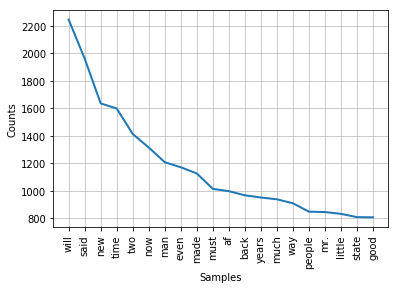

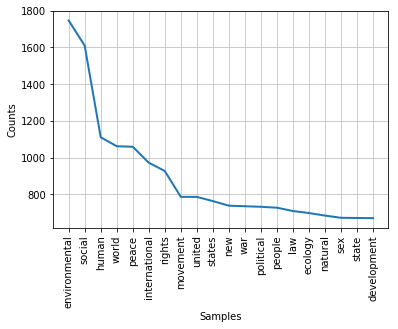

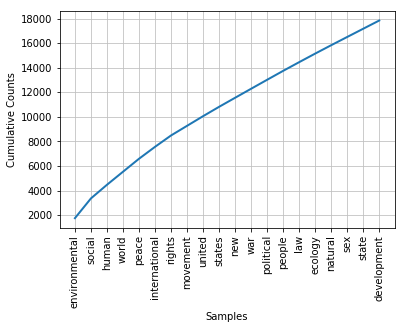

(True, True, True)

In [40]:
RC.plot(20), SC.plot(20), SC.plot(20, cumulative = True)

In [41]:
SC.tabulate(7)

environmental        social         human         world         peace international        rights 
         1747          1610          1111          1062          1059           972           927 


True

In [42]:
SC.get_top_frequents(10)

[('environmental', 1747),
 ('social', 1610),
 ('human', 1111),
 ('world', 1062),
 ('peace', 1059),
 ('international', 972),
 ('rights', 927),
 ('movement', 786),
 ('united', 786),
 ('states', 763)]

In [43]:
SC.get_least_frequents(10)

[('outhwaite', 3),
 ('expedite', 3),
 ('methodeutic', 3),
 ('hanson', 3),
 ('abduce', 3),
 ('formulae', 3),
 ('faults', 3),
 ('josephson', 3),
 ('reprinted', 3),
 ('syllabus', 3)]

### 5.1 Number of unique words after cleaning 

In [44]:
n_Spec = SC.get_count_uniques()
n_Ref = RC.get_count_uniques()
print('Number of unique words: Specific = {}, Reference = {}'.format(n_Spec, n_Ref))

Number of unique words: Specific = 11644, Reference = 19898


### 5.2  Total word counts after cleaning 

In [45]:
s_Spec = SC.get_size()
s_Ref =  RC.get_size()
print('Total of words: Specific = {}, Reference = {}'.format(s_Spec, s_Ref))

Total of words: Specific = 280900, Reference = 478850


### 5.3 Displaying ordered list of terms

List of words in the corpus in case, for a visual inspection. Such inspections will be used both to improve tokenization as well as filtering.

In [46]:
SC.get_top_frequents(n_Spec)

[('environmental', 1747),
 ('social', 1610),
 ('human', 1111),
 ('world', 1062),
 ('peace', 1059),
 ('international', 972),
 ('rights', 927),
 ('movement', 786),
 ('united', 786),
 ('states', 763),
 ('new', 738),
 ('war', 735),
 ('political', 732),
 ('people', 727),
 ('law', 709),
 ('ecology', 698),
 ('natural', 684),
 ('sex', 672),
 ('state', 671),
 ('development', 670),
 ('environment', 662),
 ('species', 661),
 ('energy', 653),
 ('economic', 622),
 ('society', 615),
 ('use', 577),
 ('global', 576),
 ('justice', 568),
 ('women', 554),
 ('theory', 544),
 ('work', 522),
 ('based', 515),
 ('resources', 510),
 ('used', 492),
 ('example', 488),
 ('conservation', 486),
 ('earth', 480),
 ('marriage', 478),
 ('right', 474),
 ('nature', 470),
 ('countries', 464),
 ('term', 462),
 ('equality', 457),
 ('green', 455),
 ('against', 450),
 ('sustainable', 450),
 ('system', 449),
 ('education', 445),
 ('life', 439),
 ('ecological', 439),
 ('government', 428),
 ('party', 427),
 ('socialism', 424),
 

In [47]:
common_words = SC.intersection(RC)

In [48]:
pp.pprint(common_words)

['critical',
 'thinking',
 'sculpture',
 'objective',
 'analysis',
 'facts',
 'form',
 'judgment',
 'subject',
 'complex',
 'several',
 'different',
 'definitions',
 'exist',
 'generally',
 'include',
 'rational',
 'skeptical',
 'evaluation',
 'factual',
 'evidence',
 'logic',
 'deduction',
 'induction',
 'functions',
 'procedure',
 'habits',
 'traits',
 'mind',
 'research',
 'education',
 'efficacy',
 'importance',
 'computer',
 'communication',
 'reading',
 'earliest',
 'documentation',
 'teachings',
 'recorded',
 'plato',
 'established',
 'fact',
 'depend',
 'upon',
 'authority',
 'sound',
 'knowledge',
 'insight',
 'demonstrated',
 'persons',
 'power',
 'high',
 'position',
 'yet',
 'deeply',
 'confused',
 'irrational',
 'asking',
 'deep',
 'questions',
 'profoundly',
 'accept',
 'ideas',
 'worthy',
 'belief',
 'seeking',
 'closely',
 'examining',
 'reasoning',
 'assumptions',
 'analyzing',
 'basic',
 'concepts',
 'implications',
 'said',
 'done',
 'method',
 'questioning',
 'now',

 'vincent',
 'connotations',
 'temporal',
 'longer',
 'shorter',
 'duration',
 'complete',
 'carry',
 'sense',
 'endless',
 'ken',
 'writes',
 'translated',
 'latin',
 'denominations',
 'thread',
 'heart',
 'ever',
 'name',
 'transcends',
 'liberal',
 'characterized',
 'responsible',
 'search',
 'meaning',
 'share',
 'creed',
 'unified',
 'shared',
 'growth',
 'authoritarian',
 'requirement',
 'origins',
 'fewer',
 'identified',
 'humanist',
 'pagan',
 'assume',
 'label',
 'formed',
 'consolidation',
 'american',
 'boston',
 'serves',
 'mostly',
 'canadian',
 'body',
 'uphold',
 'actions',
 'safeguard',
 'indeed',
 'attracted',
 'solidarity',
 'perceived',
 'socially',
 'conscious',
 'global',
 'tendencies',
 'author',
 'david',
 'says',
 'background',
 'contain',
 'naturally',
 'incarnation',
 'receive',
 'paths',
 'accepting',
 'degrees',
 'everyone',
 'actually',
 'knows',
 'six',
 'orthodox',
 'unorthodox',
 'traditions',
 'reform',
 'movements',
 'response',
 'colonialism',
 'deno

 'viable',
 'fabric',
 'principal',
 'experiment',
 'enabling',
 'anyone',
 'participate',
 'affiliation',
 'demographic',
 'emerging',
 'projects',
 'evolution',
 'links',
 'impersonal',
 'societies',
 'relations',
 'exchange',
 'favors',
 'lower',
 'income',
 'distribute',
 'wealth',
 'corruption',
 'overt',
 'constant',
 'access',
 'bounded',
 'identities',
 'easily',
 'swayed',
 'integrated',
 'ties',
 'economically',
 'contracts',
 'enforced',
 'loyalty',
 'protection',
 'contract',
 'worse',
 'welfare',
 'demand',
 'home',
 'abroad',
 'tend',
 'assumes',
 'markets',
 'natural',
 'learned',
 'norm',
 'spending',
 'regulation',
 'necessary',
 'mechanism',
 'consumer',
 'purchasing',
 'equitable',
 'food',
 'annually',
 'september',
 'dedicated',
 'specifically',
 'combat',
 'zone',
 'humanitarian',
 'aid',
 'celebrated',
 'kept',
 'preventive',
 'reduce',
 'standing',
 'suggestion',
 'annual',
 'dates',
 'achievement',
 'openly',
 'expressed',
 'establishment',
 'uncertain',
 'stag

 'possessions',
 'preferential',
 'option',
 'catholics',
 'brothers',
 'mine',
 'affect',
 'regularly',
 'leo',
 'classes',
 'rejecting',
 'socialism',
 'labor',
 'unions',
 'instability',
 'arisen',
 'reconstruction',
 'encourages',
 'corpus',
 'economics',
 'mortgage',
 'portion',
 'overall',
 'contribution',
 'spoke',
 'express',
 'fullness',
 'est',
 'inform',
 'debate',
 'official',
 'updated',
 'criticize',
 'deny',
 'quo',
 'disagree',
 'elaborate',
 'wells',
 'entitled',
 'austrian',
 'discover',
 'observance',
 'secure',
 'belong',
 'nonsense',
 'stone',
 'ben',
 'wales',
 'indicative',
 'desirable',
 'trivial',
 'tangible',
 'assertion',
 'intention',
 'inevitably',
 'provision',
 'paid',
 'desires',
 'forcibly',
 'supply',
 'lose',
 'trees',
 'paper',
 'print',
 'something',
 'entails',
 'categories',
 'maintains',
 'progressivism',
 'atomic',
 'jet',
 'machine',
 'space',
 'modernity',
 'rationalism',
 'suffrage',
 'edith',
 'william',
 'bryan',
 'marquis',
 'evans',
 'hug

 'foods',
 'heterogeneous',
 'cleared',
 'seeds',
 'exposed',
 'smoke',
 'triggered',
 'persistence',
 'floor',
 'minerals',
 'worms',
 'familiar',
 'displace',
 'axis',
 'ph',
 'smallest',
 'billions',
 'bearing',
 'linkage',
 'estimated',
 'twenty',
 'thirty',
 'drop',
 'projected',
 'registered',
 'melting',
 'ice',
 'caps',
 'breeding',
 'tracking',
 'prevailing',
 'sections',
 'groundwork',
 'record',
 'viewed',
 'static',
 'contrasts',
 'died',
 'accounts',
 'nile',
 'safe',
 'nutrition',
 'hygiene',
 'nowhere',
 'belonging',
 'studying',
 'survey',
 'stephen',
 'forbes',
 'van',
 'bradley',
 'pioneer',
 'drew',
 'inspiration',
 'newton',
 'physics',
 'fashion',
 'artist',
 'writer',
 'professor',
 'mark',
 'layout',
 'garden',
 'abbey',
 'planted',
 'exception',
 'gilbert',
 'approached',
 'substantial',
 'ellen',
 'descriptive',
 'clements',
 'launched',
 'analogous',
 'shift',
 'histories',
 'jan',
 'figure',
 'inspired',
 'pioneered',
 'numerical',
 'alfred',
 'landmark',
 'i

 'preface',
 'everywhere',
 'overcoming',
 'conceive',
 'preserving',
 'preferred',
 'indistinguishable',
 'returning',
 'proceed',
 'preceding',
 'tremendous',
 'chart',
 'alienation',
 'constitutional',
 'derive',
 'rigorously',
 'multitude',
 'demonstrate',
 'quantum',
 'sudden',
 'revulsion',
 'steam',
 'grain',
 'wheat',
 'incorporates',
 'moments',
 'likewise',
 'passes',
 'ceases',
 'transforms',
 'philosophic',
 'napoleon',
 'accumulation',
 'dictatorship',
 'budapest',
 'frankfurt',
 'instrumental',
 'rosa',
 'luxemburg',
 'clara',
 'lenin',
 'stalin',
 'reich',
 'mao',
 'wright',
 'mills',
 'erich',
 'fromm',
 'il',
 'harvey',
 'eric',
 'nelson',
 'castro',
 'dimensional',
 'sphere',
 'hands',
 'turned',
 'kernel',
 'shell',
 'intertwined',
 'exemplified',
 'ussr',
 'child',
 'soon',
 'stripped',
 'gentlemen',
 'declare',
 'professors',
 'lets',
 'town',
 'acceleration',
 'gradual',
 'publishers',
 'issued',
 'wherein',
 'quotes',
 'ready',
 'heads',
 'uninterrupted',
 'passi

 'bat',
 'remarkably',
 'accompanied',
 'invariably',
 'reactants',
 'molecules',
 'expenditure',
 'seconds',
 'expressing',
 'suddenly',
 'spark',
 'reproduce',
 'phosphate',
 'efficiencies',
 'evenly',
 'remainder',
 'simpler',
 'earthquakes',
 'snow',
 'dam',
 'generators',
 'warm',
 'radioactive',
 'decay',
 'atoms',
 'strain',
 'heavy',
 'stars',
 'operator',
 'relativistic',
 'calculating',
 'accelerate',
 'einstein',
 'unexpected',
 'calculations',
 'annihilation',
 'approximation',
 'vector',
 'transit',
 'generator',
 'items',
 'battery',
 'turbine',
 'driving',
 'crane',
 'motor',
 'stores',
 'uranium',
 'fission',
 'pi',
 'weighed',
 'liberate',
 'recovered',
 'engines',
 'grows',
 'whenever',
 'wish',
 'happens',
 'calculate',
 'observers',
 'vice',
 'versa',
 'tomorrow',
 'interval',
 'compressed',
 'delta',
 'charges',
 'spontaneous',
 'transfers',
 'write',
 'chiefly',
 'ignoring',
 'alternatively',
 'vitally',
 'magnitude',
 'imposes',
 'illustration',
 'athlete',
 'wor

 'savings',
 'definitive',
 'distrust',
 'assure',
 'conspiracy',
 'blocks',
 'venture',
 'meyer',
 'gerald',
 'steve',
 'quiet',
 'sue',
 'closing',
 'affluence',
 'preoccupied',
 'absorbed',
 'merry',
 'disc',
 'disillusionment',
 'lincoln',
 'memorial',
 'birmingham',
 'theater',
 'populated',
 'strauss',
 'pig',
 'ohio',
 'visitors',
 'ciudad',
 'valley',
 'broadcast',
 'souls',
 'lyrics',
 'tours',
 'mobilization',
 'veterans',
 'marched',
 'grasp',
 'automobile',
 'song',
 'columnist',
 'dropping',
 'cars',
 'diet',
 'acre',
 'club',
 'arkansas',
 'louisiana',
 'dakota',
 'reservations',
 'grateful',
 'doors',
 'investigated',
 'breakthrough',
 'indiscriminate',
 'shut',
 'experimenting',
 'hub',
 'indulgence',
 'obstacle',
 'dick',
 'dylan',
 'pete',
 'pet',
 'collapsed',
 'successes',
 'cheap',
 'phil',
 'velvet',
 'captain',
 'modal',
 'legendary',
 'plastic',
 'innovations',
 'cream',
 'electronic',
 'curious',
 'apple',
 'cult',
 'clothes',
 'protested',
 'load',
 'hoover',


In [49]:
len(common_words)

7788

### 5.5 Set of terms/words that occur in the sample but not in the reference corpus.

This specific set will be incorporated later below. 

In [50]:
input_specifics = SC.difference(RC)

In [51]:
print(len(input_specifics))

3856


In [52]:
pp.pprint(input_specifics)

{'aarhus': 4,
 'abatement': 7,
 'abbott': 5,
 'abdel': 3,
 'abdelrahim': 5,
 'abduce': 3,
 'abduction': 118,
 'abductions': 4,
 'abductive': 39,
 'abdullah': 3,
 'abhay': 5,
 'abhinavagupta': 4,
 'abhor': 3,
 'abiotic': 16,
 'abolished': 20,
 'abolishing': 6,
 'abomination': 4,
 'aboriginal': 3,
 'abortions': 3,
 'abrahamic': 6,
 'abrogation': 3,
 'absolutism': 7,
 'absolutist': 5,
 'abstain': 4,
 'abstaining': 3,
 'abu': 3,
 'abundances': 3,
 'abusive': 3,
 'academia': 12,
 'academics': 12,
 'acapulco': 4,
 'accessed': 6,
 'accessibility': 6,
 'accommodation': 6,
 'accords': 5,
 'accountable': 6,
 'accredited': 3,
 'accrue': 5,
 'accrues': 3,
 'acfor': 4,
 'acknowledgement': 5,
 'acknowledgment': 3,
 'acled': 3,
 'acoustic': 6,
 'acronym': 3,
 'activism': 54,
 'activist': 83,
 'activists': 91,
 'actualization': 5,
 'adaptive': 19,
 'addams': 5,
 'addison': 3,
 'additionality': 4,
 'adhering': 3,
 'adi': 11,
 'adjective': 5,
 'admits': 4,
 'adopts': 3,
 'adorno': 12,
 'adp': 3,
 'adult

 'costanza': 3,
 'couldn': 3,
 'countercultural': 9,
 'counterculture': 89,
 'countered': 3,
 'countermeasures': 3,
 'countrys': 6,
 'covert': 7,
 'cowan': 4,
 'cowardice': 4,
 'cowles': 10,
 'cowpea': 3,
 'cp': 3,
 'cramped': 3,
 'crc': 3,
 'creators': 3,
 'credentials': 5,
 'credibility': 7,
 'credible': 6,
 'cremer': 4,
 'crested': 3,
 'crimean': 5,
 'criminology': 9,
 'criticised': 24,
 'criticising': 4,
 'criticizes': 6,
 'criticizing': 4,
 'critique': 64,
 'critiqued': 3,
 'critiques': 6,
 'criture': 5,
 'croatia': 12,
 'cronyism': 5,
 'crosland': 3,
 'crow': 9,
 'crowdsourcing': 4,
 'crucially': 3,
 'crustaceans': 3,
 'csd': 4,
 'csr': 4,
 'cue': 4,
 'culminated': 4,
 'culminating': 3,
 'cultivar': 3,
 'cultivating': 3,
 'cunha': 3,
 'curaao': 3,
 'custody': 6,
 'cybernetics': 4,
 'cybersyn': 4,
 'cyborg': 3,
 'cyclic': 10,
 'cyclical': 3,
 'cycling': 10,
 'cyprus': 14,
 'cyrenaics': 4,
 'czech': 18,
 'czechoslovak': 5,
 'dada': 4,
 'dalai': 6,
 'dalhousie': 3,
 'daly': 12,
 'da

 'feminism': 217,
 'feminisms': 6,
 'feminist': 244,
 'feminists': 86,
 'ferdinand': 4,
 'fernand': 3,
 'ferrer': 8,
 'fertiliser': 3,
 'feudalism': 8,
 'feuerbach': 4,
 'feyerabend': 5,
 'fibre': 5,
 'fibres': 6,
 'fichte': 4,
 'ficino': 12,
 'filipino': 3,
 'filmmaker': 4,
 'filmmakers': 5,
 'filmmaking': 3,
 'filmography': 4,
 'fines': 4,
 'finke': 4,
 'finland': 30,
 'finnish': 7,
 'fireplaces': 3,
 'firewood': 5,
 'fisheries': 20,
 'fishery': 4,
 'fishes': 9,
 'fixation': 3,
 'flagship': 5,
 'flavell': 4,
 'flawed': 7,
 'flaws': 4,
 'flix': 9,
 'flooding': 5,
 'flora': 19,
 'flourishing': 5,
 'fluctuations': 7,
 'flue': 4,
 'fluency': 3,
 'fluxus': 8,
 'fminine': 5,
 'focuses': 48,
 'focussing': 3,
 'fodder': 3,
 'fonda': 3,
 'fontenelle': 3,
 'footprint': 18,
 'footprints': 3,
 'forbidding': 3,
 'forefront': 4,
 'forested': 5,
 'forestry': 43,
 'forgery': 3,
 'formalism': 6,
 'formalized': 8,
 'forman': 7,
 'forster': 3,
 'forsyth': 3,
 'forums': 4,
 'fossil': 50,
 'fostering': 7

 'kaufmann': 3,
 'kazakhstan': 3,
 'kehler': 3,
 'kekes': 3,
 'keller': 4,
 'kelly': 15,
 'kelp': 8,
 'kemal': 3,
 'kensho': 5,
 'kenya': 12,
 'kerouac': 4,
 'kerry': 8,
 'kesey': 9,
 'kevin': 5,
 'keystone': 21,
 'keywords': 3,
 'kgb': 18,
 'ki': 4,
 'kibbutz': 5,
 'killelea': 3,
 'killings': 6,
 'kilometres': 3,
 'kim': 7,
 'kin': 9,
 'kingdoms': 3,
 'kissinger': 5,
 'kittiwake': 3,
 'klein': 3,
 'kluwer': 3,
 'km': 3,
 'knesset': 4,
 'ko': 3,
 'kofi': 6,
 'kollontai': 6,
 'kologie': 3,
 'koran': 4,
 'kristin': 5,
 'kronstadt': 8,
 'kropotkin': 19,
 'krugman': 6,
 'kuhn': 10,
 'kullmann': 3,
 'kumar': 9,
 'kuomintang': 4,
 'kurdish': 3,
 'kurt': 4,
 'kuwait': 13,
 'kwame': 3,
 'kyi': 3,
 'labelled': 5,
 'labourers': 3,
 'lagrange': 3,
 'lagrangian': 5,
 'lai': 4,
 'lakatos': 3,
 'lama': 6,
 'lambert': 4,
 'landauer': 3,
 'landfill': 15,
 'landfills': 11,
 'landslides': 3,
 'lanham': 3,
 'lanier': 3,
 'lanka': 12,
 'lankavatara': 5,
 'lansbury': 3,
 'laozi': 3,
 'lassalle': 5,
 'later

 'opposes': 12,
 'opposites': 7,
 'oppositional': 3,
 'opt': 4,
 'optimization': 3,
 'optimizing': 3,
 'options': 12,
 'organisation': 82,
 'organisational': 8,
 'organisations': 56,
 'organise': 8,
 'organised': 27,
 'organising': 7,
 'organismal': 3,
 'organizer': 8,
 'orientalism': 9,
 'orientations': 4,
 'originates': 8,
 'origination': 3,
 'ornithologist': 3,
 'ortega': 3,
 'orwell': 3,
 'oscillator': 3,
 'osho': 5,
 'otters': 8,
 'otto': 7,
 'ou': 3,
 'outbreak': 14,
 'outgrowth': 5,
 'outhwaite': 3,
 'outlawing': 3,
 'outlining': 6,
 'ove': 3,
 'overarching': 6,
 'overconfidence': 3,
 'overconsumption': 5,
 'overexploitation': 7,
 'overfishing': 9,
 'overgrazing': 5,
 'overhunting': 3,
 'overlaps': 3,
 'overline': 30,
 'overpopulation': 11,
 'override': 3,
 'overseen': 3,
 'overshadowed': 3,
 'oversight': 3,
 'overthrowing': 3,
 'overturned': 5,
 'overview': 12,
 'owenites': 3,
 'owens': 3,
 'oxymoron': 4,
 'pacepa': 6,
 'pacificism': 3,
 'pacifist': 80,
 'pacifists': 37,
 'padd

 'sentient': 8,
 'seoul': 4,
 'separatism': 6,
 'separatist': 4,
 'sequencing': 3,
 'sequestration': 3,
 'seral': 7,
 'serbia': 7,
 'sere': 4,
 'serengeti': 3,
 'seres': 3,
 'serra': 5,
 'ses': 3,
 'sewerage': 3,
 'sexism': 17,
 'sexist': 5,
 'sextii': 4,
 'shadism': 3,
 'shaftesbury': 4,
 'shaivism': 23,
 'shaked': 4,
 'shalom': 8,
 'shaming': 3,
 'shankara': 19,
 'shariah': 3,
 'shentong': 12,
 'shimon': 6,
 'shimun': 3,
 'shipbuilders': 3,
 'shiva': 8,
 'si': 12,
 'sic': 4,
 'sierra': 22,
 'signalling': 6,
 'signatories': 6,
 'signatory': 7,
 'signify': 5,
 'sikh': 19,
 'sikhism': 20,
 'silva': 4,
 'silverman': 5,
 'simko': 10,
 'simone': 7,
 'simplistic': 5,
 'sinai': 3,
 'sinclair': 8,
 'sindacale': 3,
 'singapore': 17,
 'singh': 5,
 'sinks': 5,
 'sint': 4,
 'sipri': 6,
 'siting': 8,
 'situ': 6,
 'situational': 3,
 'situationist': 4,
 'sjw': 5,
 'skewed': 3,
 'slasher': 4,
 'slovakia': 3,
 'slovenia': 10,
 'slut': 3,
 'smarter': 3,
 'smog': 7,
 'smokey': 3,
 'snchez': 4,
 'snyder'

 'wri': 13,
 'wrongful': 3,
 'wto': 16,
 'wtos': 4,
 'wu': 5,
 'wwf': 6,
 'xavier': 3,
 'xenophobia': 4,
 'xi': 3,
 'xvi': 4,
 'yajnavalkya': 3,
 'yamuna': 4,
 'yasser': 3,
 'yearley': 3,
 'yellowstone': 5,
 'yemen': 14,
 'yemeni': 3,
 'yevgeny': 3,
 'yi': 4,
 'yippies': 3,
 'yitzhak': 3,
 'yoga': 18,
 'yogacara': 22,
 'yogcra': 5,
 'yogcrins': 3,
 'yogi': 3,
 'youtube': 7,
 'yuan': 4,
 'zakat': 4,
 'zapf': 5,
 'zedong': 3,
 'zeno': 4,
 'zerzan': 6,
 'zetkin': 9,
 'zhang': 5,
 'zhexembayeva': 3,
 'zhi': 3,
 'zhuangzi': 4,
 'zionism': 10,
 'zionist': 5,
 'zonneveld': 3,
 'zoological': 9,
 'zoologist': 6,
 'zoology': 7,
 'zoos': 5,
 'zoroastrian': 3,
 'zoroastrianism': 6,
 'zrich': 3,
 'zygote': 3}


# *from this point down has not been revised yet*
Bulent

## 7. Stemming

In [53]:
stemmer = PorterStemmer()
input_wset_stems = {k: stemmer.stem(k) for k in SC.list_terms()}
common_wset_stems = {k: stemmer.stem(k) for k in common_words}
pp.pprint(common_wset_stems)

{'aaron': 'aaron',
 'abandon': 'abandon',
 'abandoned': 'abandon',
 'abandoning': 'abandon',
 'abandonment': 'abandon',
 'abbe': 'abb',
 'abbey': 'abbey',
 'abide': 'abid',
 'abilities': 'abil',
 'ability': 'abil',
 'able': 'abl',
 'abolish': 'abolish',
 'abolition': 'abolit',
 'abortion': 'abort',
 'abraham': 'abraham',
 'abroad': 'abroad',
 'abrupt': 'abrupt',
 'absence': 'absenc',
 'absent': 'absent',
 'absolute': 'absolut',
 'absolutely': 'absolut',
 'absorb': 'absorb',
 'absorbed': 'absorb',
 'absorption': 'absorpt',
 'abstention': 'abstent',
 'abstract': 'abstract',
 'abstraction': 'abstract',
 'absurd': 'absurd',
 'abundance': 'abund',
 'abundant': 'abund',
 'abuse': 'abus',
 'abused': 'abus',
 'abuses': 'abus',
 'academic': 'academ',
 'academies': 'academi',
 'academy': 'academi',
 'accelerate': 'acceler',
 'accelerated': 'acceler',
 'acceleration': 'acceler',
 'accept': 'accept',
 'acceptable': 'accept',
 'acceptance': 'accept',
 'accepted': 'accept',
 'accepting': 'accept',
 

 'capable': 'capabl',
 'capacities': 'capac',
 'capacity': 'capac',
 'cape': 'cape',
 'capita': 'capita',
 'capital': 'capit',
 'capitalism': 'capit',
 'capitalist': 'capitalist',
 'caps': 'cap',
 'captain': 'captain',
 'capture': 'captur',
 'captured': 'captur',
 'car': 'car',
 'carbon': 'carbon',
 'cardinal': 'cardin',
 'care': 'care',
 'career': 'career',
 'careers': 'career',
 'careful': 'care',
 'carefully': 'care',
 'carey': 'carey',
 'caribbean': 'caribbean',
 'caring': 'care',
 'carl': 'carl',
 'carnegie': 'carnegi',
 'carolina': 'carolina',
 'carpenter': 'carpent',
 'carriage': 'carriag',
 'carried': 'carri',
 'carrier': 'carrier',
 'carries': 'carri',
 'carrots': 'carrot',
 'carry': 'carri',
 'carrying': 'carri',
 'cars': 'car',
 'carter': 'carter',
 'carved': 'carv',
 'case': 'case',
 'cases': 'case',
 'cash': 'cash',
 'cast': 'cast',
 'caste': 'cast',
 'casting': 'cast',
 'castle': 'castl',
 'castro': 'castro',
 'casts': 'cast',
 'casual': 'casual',
 'casualties': 'casualti

 'crown': 'crown',
 'crucial': 'crucial',
 'cruel': 'cruel',
 'cruelty': 'cruelti',
 'crush': 'crush',
 'cry': 'cri',
 'cuba': 'cuba',
 'cuban': 'cuban',
 'cues': 'cue',
 'cult': 'cult',
 'cultivate': 'cultiv',
 'cultivated': 'cultiv',
 'cultivation': 'cultiv',
 'cultural': 'cultur',
 'culturally': 'cultur',
 'culture': 'cultur',
 'cultures': 'cultur',
 'cumulative': 'cumul',
 'cup': 'cup',
 'curb': 'curb',
 'cure': 'cure',
 'curiosity': 'curios',
 'curious': 'curiou',
 'currency': 'currenc',
 'current': 'current',
 'currently': 'current',
 'currents': 'current',
 'curricula': 'curricula',
 'curriculum': 'curriculum',
 'curse': 'curs',
 'curve': 'curv',
 'custom': 'custom',
 'customary': 'customari',
 'customers': 'custom',
 'customs': 'custom',
 'cut': 'cut',
 'cuts': 'cut',
 'cutting': 'cut',
 'cycle': 'cycl',
 'cycles': 'cycl',
 'cynicism': 'cynic',
 'cynics': 'cynic',
 'czechoslovakia': 'czechoslovakia',
 'da': 'da',
 'daily': 'daili',
 'dakota': 'dakota',
 'dale': 'dale',
 'dalton

 'engagements': 'engag',
 'engages': 'engag',
 'engaging': 'engag',
 'engendered': 'engend',
 'engine': 'engin',
 'engineer': 'engin',
 'engineering': 'engin',
 'engineers': 'engin',
 'engines': 'engin',
 'england': 'england',
 'english': 'english',
 'enhance': 'enhanc',
 'enhanced': 'enhanc',
 'enjoy': 'enjoy',
 'enjoyed': 'enjoy',
 'enjoying': 'enjoy',
 'enjoyment': 'enjoy',
 'enjoys': 'enjoy',
 'enlightened': 'enlighten',
 'enlisted': 'enlist',
 'enormous': 'enorm',
 'enough': 'enough',
 'ensemble': 'ensembl',
 'ensued': 'ensu',
 'ensuing': 'ensu',
 'ensure': 'ensur',
 'entail': 'entail',
 'entails': 'entail',
 'enter': 'enter',
 'entered': 'enter',
 'entering': 'enter',
 'enterprise': 'enterpris',
 'enterprises': 'enterpris',
 'entertainment': 'entertain',
 'enthusiastic': 'enthusiast',
 'enthusiastically': 'enthusiast',
 'entire': 'entir',
 'entirely': 'entir',
 'entirety': 'entireti',
 'entities': 'entiti',
 'entitled': 'entitl',
 'entity': 'entiti',
 'entrance': 'entranc',
 'ent

 'gradually': 'gradual',
 'graduate': 'graduat',
 'graduates': 'graduat',
 'graham': 'graham',
 'grain': 'grain',
 'grammar': 'grammar',
 'grand': 'grand',
 'grandson': 'grandson',
 'grant': 'grant',
 'granted': 'grant',
 'granting': 'grant',
 'grants': 'grant',
 'graph': 'graph',
 'graphic': 'graphic',
 'grasp': 'grasp',
 'grasped': 'grasp',
 'grass': 'grass',
 'grateful': 'grate',
 'grave': 'grave',
 'gravitational': 'gravit',
 'gravity': 'graviti',
 'gray': 'gray',
 'grazing': 'graze',
 'great': 'great',
 'greater': 'greater',
 'greatest': 'greatest',
 'greatly': 'greatli',
 'greece': 'greec',
 'greed': 'greed',
 'greek': 'greek',
 'greeks': 'greek',
 'green': 'green',
 'greene': 'green',
 'greenland': 'greenland',
 'greens': 'green',
 'greenwich': 'greenwich',
 'greeted': 'greet',
 'gregg': 'gregg',
 'gregory': 'gregori',
 'grew': 'grew',
 'grocery': 'groceri',
 'gross': 'gross',
 'ground': 'ground',
 'grounded': 'ground',
 'grounds': 'ground',
 'groundwork': 'groundwork',
 'group'

 'invite': 'invit',
 'invited': 'invit',
 'inviting': 'invit',
 'invoked': 'invok',
 'involuntary': 'involuntari',
 'involve': 'involv',
 'involved': 'involv',
 'involvement': 'involv',
 'involves': 'involv',
 'involving': 'involv',
 'ion': 'ion',
 'ions': 'ion',
 'iowa': 'iowa',
 'iraq': 'iraq',
 'ireland': 'ireland',
 'irish': 'irish',
 'iron': 'iron',
 'irrational': 'irrat',
 'irrelevant': 'irrelev',
 'irrigation': 'irrig',
 'isaac': 'isaac',
 'islam': 'islam',
 'islamic': 'islam',
 'island': 'island',
 'islands': 'island',
 'isle': 'isl',
 'isolate': 'isol',
 'isolated': 'isol',
 'isolation': 'isol',
 'israel': 'israel',
 'israeli': 'isra',
 'issue': 'issu',
 'issued': 'issu',
 'issues': 'issu',
 'issuing': 'issu',
 'istanbul': 'istanbul',
 'italian': 'italian',
 'italy': 'itali',
 'items': 'item',
 'ivan': 'ivan',
 'ivory': 'ivori',
 'jack': 'jack',
 'jackson': 'jackson',
 'jacques': 'jacqu',
 'jail': 'jail',
 'james': 'jame',
 'jan': 'jan',
 'jane': 'jane',
 'january': 'januari',

 'microscopic': 'microscop',
 'mid': 'mid',
 'middle': 'middl',
 'might': 'might',
 'mighty': 'mighti',
 'migrant': 'migrant',
 'migration': 'migrat',
 'migratory': 'migratori',
 'mile': 'mile',
 'miles': 'mile',
 'milestone': 'mileston',
 'milieu': 'milieu',
 'militant': 'milit',
 'militarism': 'militar',
 'military': 'militari',
 'militia': 'militia',
 'milk': 'milk',
 'mill': 'mill',
 'millennium': 'millennium',
 'miller': 'miller',
 'million': 'million',
 'millions': 'million',
 'mills': 'mill',
 'milton': 'milton',
 'milwaukee': 'milwauke',
 'min': 'min',
 'mind': 'mind',
 'minded': 'mind',
 'minds': 'mind',
 'mine': 'mine',
 'mineral': 'miner',
 'minerals': 'miner',
 'miners': 'miner',
 'mines': 'mine',
 'minimal': 'minim',
 'minimize': 'minim',
 'minimum': 'minimum',
 'mining': 'mine',
 'minister': 'minist',
 'ministers': 'minist',
 'ministries': 'ministri',
 'ministry': 'ministri',
 'minor': 'minor',
 'minorities': 'minor',
 'minority': 'minor',
 'minors': 'minor',
 'minute': '

 'philosophical': 'philosoph',
 'philosophy': 'philosophi',
 'phosphate': 'phosphat',
 'photo': 'photo',
 'photograph': 'photograph',
 'photographs': 'photograph',
 'phrase': 'phrase',
 'physical': 'physic',
 'physically': 'physic',
 'physician': 'physician',
 'physicians': 'physician',
 'physicist': 'physicist',
 'physics': 'physic',
 'physiological': 'physiolog',
 'pi': 'pi',
 'pick': 'pick',
 'picked': 'pick',
 'picture': 'pictur',
 'pictured': 'pictur',
 'piece': 'piec',
 'pieces': 'piec',
 'pierre': 'pierr',
 'piers': 'pier',
 'piety': 'pieti',
 'pig': 'pig',
 'pigeon': 'pigeon',
 'pilgrimage': 'pilgrimag',
 'pillars': 'pillar',
 'pilot': 'pilot',
 'pilots': 'pilot',
 'pine': 'pine',
 'pink': 'pink',
 'pioneer': 'pioneer',
 'pioneered': 'pioneer',
 'pioneering': 'pioneer',
 'pioneers': 'pioneer',
 'pious': 'piou',
 'pipeline': 'pipelin',
 'pit': 'pit',
 'place': 'place',
 'placed': 'place',
 'placement': 'placement',
 'places': 'place',
 'placing': 'place',
 'plain': 'plain',
 'pl

 'released': 'releas',
 'releases': 'releas',
 'relevance': 'relev',
 'relevant': 'relev',
 'reliable': 'reliabl',
 'reliance': 'relianc',
 'relied': 'reli',
 'relief': 'relief',
 'relies': 'reli',
 'relieve': 'reliev',
 'religion': 'religion',
 'religions': 'religion',
 'religious': 'religi',
 'rely': 'reli',
 'relying': 'reli',
 'remain': 'remain',
 'remainder': 'remaind',
 'remained': 'remain',
 'remaining': 'remain',
 'remains': 'remain',
 'remarkably': 'remark',
 'remarks': 'remark',
 'remarque': 'remarqu',
 'remedy': 'remedi',
 'remembered': 'rememb',
 'remind': 'remind',
 'remote': 'remot',
 'removal': 'remov',
 'remove': 'remov',
 'removed': 'remov',
 'removes': 'remov',
 'removing': 'remov',
 'renaissance': 'renaiss',
 'renamed': 'renam',
 'rendered': 'render',
 'rendering': 'render',
 'renewal': 'renew',
 'renewed': 'renew',
 'rent': 'rent',
 'rental': 'rental',
 'repeal': 'repeal',
 'repeated': 'repeat',
 'repeatedly': 'repeatedli',
 'repeats': 'repeat',
 'replace': 'replac'

 'spontaneous': 'spontan',
 'sport': 'sport',
 'sports': 'sport',
 'spot': 'spot',
 'spouses': 'spous',
 'sprang': 'sprang',
 'sprawl': 'sprawl',
 'spread': 'spread',
 'spreading': 'spread',
 'spring': 'spring',
 'springs': 'spring',
 'spurred': 'spur',
 'spy': 'spi',
 'square': 'squar',
 'squatting': 'squat',
 'sr': 'sr',
 'stability': 'stabil',
 'stable': 'stabl',
 'staff': 'staff',
 'stage': 'stage',
 'staged': 'stage',
 'stages': 'stage',
 'stagnant': 'stagnant',
 'stake': 'stake',
 'stalin': 'stalin',
 'stamp': 'stamp',
 'stance': 'stanc',
 'stand': 'stand',
 'standard': 'standard',
 'standardized': 'standard',
 'standards': 'standard',
 'standing': 'stand',
 'standpoint': 'standpoint',
 'stands': 'stand',
 'stanley': 'stanley',
 'star': 'star',
 'starch': 'starch',
 'stars': 'star',
 'start': 'start',
 'started': 'start',
 'starting': 'start',
 'starts': 'start',
 'state': 'state',
 'stated': 'state',
 'statement': 'statement',
 'statements': 'statement',
 'states': 'state',
 'st

 'unite': 'unit',
 'united': 'unit',
 'units': 'unit',
 'unity': 'uniti',
 'universal': 'univers',
 'universality': 'univers',
 'universally': 'univers',
 'universe': 'univers',
 'universities': 'univers',
 'university': 'univers',
 'unjust': 'unjust',
 'unknown': 'unknown',
 'unless': 'unless',
 'unlike': 'unlik',
 'unlikely': 'unlik',
 'unlimited': 'unlimit',
 'unmarried': 'unmarri',
 'unnatural': 'unnatur',
 'unnecessary': 'unnecessari',
 'unofficial': 'unoffici',
 'unorthodox': 'unorthodox',
 'unpleasant': 'unpleas',
 'unprecedented': 'unpreced',
 'unrealistic': 'unrealist',
 'unreasonable': 'unreason',
 'unrelated': 'unrel',
 'unreliable': 'unreli',
 'unrest': 'unrest',
 'unskilled': 'unskil',
 'unstable': 'unstabl',
 'unsuccessful': 'unsuccess',
 'unto': 'unto',
 'untouched': 'untouch',
 'unusual': 'unusu',
 'unwanted': 'unwant',
 'unwillingness': 'unwilling',
 'updated': 'updat',
 'upheaval': 'upheav',
 'upheld': 'upheld',
 'uphold': 'uphold',
 'upon': 'upon',
 'upper': 'upper',

## 8. Handling input specific term set

### 8.1 Identfying matching stems with common words. 

Note that the frequency counts are transferred accordingly.

In [54]:
specifics = {}
for k,v in input_specifics.items():
    stem = input_wset_stems[k]
    words = [w for w,s in common_wset_stems.items() if s == stem]
    if words:
        w = words[0]
        SC.tf_dist[w] += input_specifics[k]
        continue
    specifics[k] = v
# Removing the words with matching stems from the specific set.
print("Reduction due to stemm matches: ", len(input_specifics) - len(specifics))
input_specifics = specifics

Reduction due to stemm matches:  806


### 8.2 Removing open-maker specific terms.

In [55]:
with open("data/specifics_openmaker.txt", "r") as f:
    SPECIFICS_OPENMAKER = set(f.read().strip().split("\n"))
om_specific_stems = {stemmer.stem(k):k for k in SPECIFICS_OPENMAKER}
pp.pprint(om_specific_stems)

{'3-d': '3-d',
 '3d': '3d',
 'abat': 'abatement',
 'afford': 'affordable',
 'agenda21': 'agenda21',
 'anarch': 'anarchism',
 'autonom': 'autonomous',
 'biodiesel': 'biodiesel',
 'biodivers': 'biodiversity',
 'biofuel': 'biofuel',
 'bioga': 'biogas',
 'biomass': 'biomass',
 'biospher': 'biosphere',
 'bricolag': 'bricolage',
 'brundtland': 'brundtland',
 'c2c': 'c2c',
 'cad': 'cad',
 'cap-and-trad': 'cap-and-trade',
 'carfre': 'carfree',
 'cdm': 'cdm',
 'christensen': 'christensen',
 'co-creat': 'co-creation',
 'co-develop': 'co-develop',
 'co-invent': 'co-invention',
 'co-inventor': 'co-inventor',
 'coextinct': 'coextinction',
 'cognit': 'cognition',
 'commons-bas': 'commons-based',
 'computer-aid': 'computer-aided',
 'conferenc': 'conferencing',
 'consortium': 'consortium',
 'constraint': 'constraints',
 'construct': 'construct',
 'copyleft': 'copyleft',
 'copyright': 'copyright',
 'cradle-to-cradl': 'cradle-to-cradle',
 'crowdsourc': 'crowdsourcing',
 'crowdwork': 'crowdworker',
 'cuv

In [56]:
specific_wset_dirty = {}
specific_wset_stems_selected = {}
for k,v in input_specifics.items():
    stem = stemmer.stem(k)
    if stem in om_specific_stems.keys():
        if k in specific_wset_stems_selected.keys():
            specific_wset_stems_selected[stem] += v
        else:
            specific_wset_stems_selected[stem] = v
        continue
    if v > 10:
        specific_wset_dirty[k] = v
        
input_specifics = specific_wset_dirty

In [57]:
# The set of stems to be added to the set with makerness counts.
pp.pprint(specific_wset_stems_selected)

{'abat': 7,
 'anarch': 3,
 'autonom': 8,
 'biodivers': 316,
 'biofuel': 13,
 'bioga': 7,
 'biomass': 55,
 'biospher': 34,
 'brundtland': 15,
 'cdm': 8,
 'cognit': 48,
 'constraint': 16,
 'copyright': 5,
 'crowdsourc': 4,
 'deforest': 45,
 'desalin': 5,
 'displaystyl': 194,
 'eco': 137,
 'ecolog': 3,
 'ecopsycholog': 5,
 'ecosystem': 377,
 'electromagnet': 6,
 'footprint': 21,
 'fossil': 50,
 'freshwat': 17,
 'geotherm': 5,
 'grid': 7,
 'hydroelectr': 6,
 'infrastructur': 6,
 'internet': 17,
 'iso': 3,
 'landfil': 15,
 'lifestyl': 23,
 'methan': 28,
 'mit': 6,
 'onlin': 26,
 'organis': 8,
 'participatori': 37,
 'permacultur': 5,
 'programm': 33,
 'racism': 96,
 'recycl': 22,
 'reus': 11,
 'schumpet': 5,
 'softwar': 12,
 'stakehold': 29,
 'toolkit': 9,
 'unsustain': 21,
 'websit': 22}


### 8.3 Remaining frequent input specifics
The manual checking can help to determine what should go into "specifics_openmaker.txt"

In [58]:
print(len(input_specifics))
pp.pprint(sorted(input_specifics))

462
['abduction',
 'abductive',
 'abiotic',
 'academia',
 'activist',
 'activists',
 'adi',
 'adorno',
 'advaita',
 'afghanistan',
 'ahimsa',
 'aldo',
 'aldous',
 'altruism',
 'amazon',
 'amphibians',
 'anaerobic',
 'anarcha',
 'anarchist',
 'anarchists',
 'anarcho',
 'antarctic',
 'anthem',
 'anthropocentric',
 'anthropocentrism',
 'anti',
 'aquatic',
 'aquifer',
 'arabia',
 'arbitration',
 'archived',
 'argentina',
 'armenia',
 'arne',
 'articulated',
 'atman',
 'aversion',
 'bah',
 'bakunin',
 'bangladesh',
 'basel',
 'bbc',
 'bce',
 'belgium',
 'bentham',
 'bertrand',
 'bhopal',
 'biases',
 'bibliography',
 'biogeography',
 'biologist',
 'biologists',
 'biotic',
 'bolivia',
 'bolshevik',
 'bolsheviks',
 'bookchin',
 'brahman',
 'bulgaria',
 'cannabis',
 'carson',
 'cbnrm',
 'ce',
 'ceasefire',
 'centre',
 'centred',
 'centres',
 'characterised',
 'chile',
 'chomsky',
 'cia',
 'cleanup',
 'cnt',
 'collectivist',
 'colombia',
 'colour',
 'commens',
 'conservationists',
 'consumerism'

In [59]:
specific_wset_stems = {}
for k,v in input_specifics.items():
    stem = stemmer.stem(k)
    if stem in specific_wset_stems.keys():
        specific_wset_stems[stem].append((k,v))
    else:
        specific_wset_stems[stem] = [(k,v)]
pp.pprint(specific_wset_stems)

{'abduct': [('abduction', 118), ('abductive', 39)],
 'abiot': [('abiotic', 16)],
 'academia': [('academia', 12)],
 'activist': [('activists', 91), ('activist', 83)],
 'adi': [('adi', 11)],
 'adorno': [('adorno', 12)],
 'advaita': [('advaita', 126)],
 'afghanistan': [('afghanistan', 16)],
 'ahimsa': [('ahimsa', 81)],
 'aldo': [('aldo', 15)],
 'aldou': [('aldous', 15)],
 'altruism': [('altruism', 43)],
 'amazon': [('amazon', 15)],
 'amphibian': [('amphibians', 11)],
 'anaerob': [('anaerobic', 11)],
 'anarcha': [('anarcha', 13)],
 'anarchist': [('anarchist', 241), ('anarchists', 92)],
 'anarcho': [('anarcho', 90)],
 'antarct': [('antarctic', 16)],
 'anthem': [('anthem', 15)],
 'anthropocentr': [('anthropocentric', 15), ('anthropocentrism', 11)],
 'anti': [('anti', 326)],
 'aquat': [('aquatic', 17)],
 'aquif': [('aquifer', 20)],
 'arabia': [('arabia', 12)],
 'arbitr': [('arbitration', 14)],
 'archiv': [('archived', 78)],
 'argentina': [('argentina', 22)],
 'armenia': [('armenia', 15)],
 'a

## 9. Computing representation power of common words.

In [60]:
# combine
word = []
freq = []
score = []
# common_words = [w[0] for w in common_words]
nSpec = 1.0 * n_Spec
nRef = 1.0 * n_Ref
for w in common_words:
    # Consider only words whose charcater length is larger than 1
    if len(w) > 1:
        # Log likelihood scores are computed:
        print(w, SC.tf_dist[w], RC.tf_dist[w])
        s = log((SC.tf_dist[w] / nSpec) / (RC.tf_dist[w] / nRef))
        f = SC.tf_dist[w]
        word.append(w)
        freq.append(f)
        score.append(s)

critical 289 58
thinking 309 145
sculpture 3 11
objective 44 91
analysis 201 108
facts 26 87
form 298 370
judgment 27 59
subject 151 161
complex 102 91
several 161 377
different 369 312
definitions 67 6
exist 93 59
generally 147 132
include 310 113
rational 75 25
skeptical 8 7
evaluation 43 31
factual 6 7
evidence 112 204
logic 141 17
deduction 27 12
induction 109 6
functions 39 48
procedure 12 79
habits 9 21
traits 30 6
mind 130 325
research 275 171
education 445 214
efficacy 9 9
importance 113 108
computer 35 13
communication 52 67
reading 83 141
earliest 41 22
documentation 5 3
teachings 43 6
recorded 13 43
plato 44 20
established 164 108
fact 108 447
depend 35 45
upon 166 495
authority 115 93
sound 34 204
knowledge 263 145
insight 20 22
demonstrated 32 33
persons 69 121
power 284 342
high 177 497
position 103 241
yet 67 419
deeply 18 39
confused 23 44
irrational 13 8
asking 13 67
deep 146 109
questions 63 140
profoundly 4 8
accept 38 72
ideas 227 143
worthy 8 28
belief 92 64
seekin

possibility 34 87
aspects 95 64
et 34 30
found 236 536
discourse 109 10
featured 11 8
instances 17 30
increase 116 195
discussions 16 32
comments 15 30
time 411 1598
discussion 53 94
newman 6 10
showed 28 141
similar 133 157
differential 14 16
effects 155 108
statements 34 68
linking 9 6
lacked 7 19
difficulties 16 46
participating 15 15
style 28 98
users 29 6
forth 18 71
contributions 25 29
employ 8 12
technique 9 60
called 264 401
text 58 60
systematically 13 10
relating 33 20
might 99 672
discuss 39 28
ambiguities 3 7
outside 62 210
positive 89 74
indicators 38 9
conversely 10 9
poor 92 113
labeled 16 9
attempts 53 38
bring 58 158
frequency 22 22
codes 8 17
compared 47 71
searching 4 23
roots 51 27
emphasizes 28 3
social 1610 380
limited 90 106
factor 40 71
shown 38 166
old 90 661
expertise 13 3
individuals 209 73
impact 163 67
comes 33 137
work 522 762
china 162 69
united 786 482
states 763 603
solely 21 20
maturation 3 3
unlikely 8 21
see 325 772
dramatic 8 63
differences 76 79
ac

increases 43 72
supported 76 54
showing 21 61
older 18 93
better 101 414
societal 33 4
interpersonal 6 3
conflicts 86 9
artificial 38 17
awareness 111 32
consciousness 102 30
ultimate 42 59
lie 9 59
acquired 9 26
intuitive 7 7
type 85 200
going 27 399
mere 29 47
conditioned 14 20
appropriate 56 68
situations 46 51
greater 126 188
appreciation 8 22
derived 44 39
corresponding 24 38
verb 5 4
original 119 103
taste 5 59
perceive 19 13
chosen 23 71
carl 18 41
binomial 3 36
species 661 37
mythology 5 3
restoring 8 6
adhered 4 5
egypt 33 14
mentioned 12 79
regarded 50 56
highest 57 63
justice 568 114
books 65 96
urge 5 21
readers 17 37
obtain 23 42
represented 36 56
asks 10 18
attributed 18 18
female 66 50
aloud 3 13
streets 3 60
raises 6 16
voice 23 226
taking 50 175
talmud 7 4
foresee 3 3
future 162 227
birth 40 66
choices 24 12
aspect 22 47
worldly 4 9
thinks 7 23
claims 85 74
seven 33 113
gifts 4 11
spirit 36 182
anglican 10 11
lutheran 4 3
alternate 4 11
nine 17 81
primarily 67 64
writt

committed 29 28
monks 7 10
laity 4 3
regions 42 40
majority 72 57
denomination 3 8
quote 7 17
per 103 371
empires 5 4
lands 23 25
communicating 3 7
defend 22 21
encouraged 23 29
stress 12 107
sharing 20 23
distribution 103 85
prayers 5 13
report 136 174
june 116 99
index 118 81
cost 90 229
total 95 211
output 18 35
brazil 83 8
canada 129 34
spain 59 7
armistice 59 4
policeman 7 19
interfaith 9 7
nobel 110 7
prize 95 28
treaty 94 20
perpetual 40 8
utopian 48 21
dystopian 40 7
fiction 59 46
summit 34 12
protecting 40 3
governmental 41 23
pressures 13 38
population 231 136
permanently 11 13
governments 114 61
begun 5 51
placing 14 27
restraints 3 7
occasionally 11 48
debated 13 5
voluntary 63 22
agreements 95 15
government 428 418
mexico 86 19
zealand 79 3
switzerland 40 12
moving 24 114
minimum 63 68
improvement 31 40
forest 173 66
green 464 116
volunteers 6 29
clean 64 69
chartered 3 4
small 112 542
village 31 72
compliance 46 6
mandatory 10 6
challenges 42 4
monitoring 46 13
reporting 

tangible 8 19
assertion 18 7
intention 10 36
inevitably 5 38
provision 47 47
paid 29 145
desires 6 24
forcibly 4 3
supply 49 102
lose 9 58
trees 51 101
paper 41 157
print 10 18
something 51 450
entails 16 8
categories 34 24
maintains 18 16
progressivism 14 3
atomic 16 46
jet 3 29
machine 44 103
space 59 184
modernity 8 6
rationalism 9 4
suffrage 28 5
edith 4 4
william 81 148
bryan 4 12
marquis 5 4
evans 6 10
hughes 3 27
sr 3 5
theodore 17 14
roosevelt 14 28
smith 28 54
howard 12 32
woodrow 6 4
wilson 17 62
korea 65 12
fire 51 187
manifested 8 6
procedural 15 7
grown 15 43
arose 16 18
reaction 39 124
prominence 7 5
sarah 7 26
marx 107 8
appropriation 6 5
reconcile 7 4
necessity 21 40
nearly 26 141
edition 32 37
quite 35 281
salvador 21 3
juan 6 7
luis 6 9
recently 56 123
families 40 68
bear 6 57
costs 54 176
marketplace 7 3
ruth 5 23
madison 9 23
answers 14 44
occur 45 43
infectious 8 17
diseases 15 19
prevalent 13 5
impoverished 7 3
prevented 7 27
structures 61 31
affirm 8 12
strengthe

ranges 10 10
distances 4 19
periods 11 47
renewal 143 8
directions 13 30
experimentation 16 13
cornerstone 3 3
allocated 3 5
ernest 7 10
ago 19 246
hydrogen 19 39
vapor 3 12
sun 27 112
hit 5 114
surface 34 200
trapped 7 7
reducing 46 31
millions 17 49
reduced 30 79
concentrations 13 9
compounds 10 16
fermentation 4 3
oxidation 3 23
operates 4 15
temperatures 8 26
incidence 6 7
consequently 22 31
regulated 19 7
sunlight 14 17
input 30 20
radiant 14 8
generates 6 5
reactions 15 42
catalyst 4 3
absorb 7 13
capable 24 66
inorganic 3 11
stored 23 36
biochemical 8 3
bonds 5 47
shallow 22 14
suitable 7 34
vital 12 56
diffusion 3 24
slower 6 9
quickly 15 89
particles 11 42
spaces 4 11
transportation 22 43
salt 13 46
microorganisms 7 12
ions 4 9
reduces 14 7
reduction 80 42
potentials 4 4
specially 4 9
gradients 10 5
fresh 16 82
shape 20 85
gravitational 26 4
uneven 5 6
govern 16 7
cues 22 3
mechanical 29 34
failure 23 89
functionally 3 4
height 13 35
running 17 123
flying 4 43
deserts 6 5
osmo

pbs 3 9
cap 13 27
bowl 4 23
yes 10 144
electrical 9 46
resembles 5 9
appeal 30 63
contradiction 20 13
comprising 7 3
antithesis 13 3
tension 11 59
resolved 19 21
hegelian 24 3
medieval 18 18
criticisms 35 11
owes 4 5
intentional 11 5
outward 5 10
thorough 3 21
cloak 6 3
empty 51 64
destructive 18 25
detection 4 13
piety 6 4
replies 4 10
agreeing 6 7
hate 24 42
absurd 5 17
willing 9 69
reaches 7 25
stresses 10 19
affinity 11 5
counterpart 6 9
passage 22 49
opponent 14 15
definite 9 37
arts 49 66
walter 28 40
roger 9 15
dramatically 6 10
vigorous 4 29
groupings 5 9
prominent 63 40
prodigy 3 3
album 9 6
goethe 4 3
lectures 21 15
absolute 78 30
idealism 20 3
elaborated 8 3
usual 16 96
pass 22 89
phase 19 72
journey 8 28
scheme 30 33
deliberately 9 30
expressly 4 3
preface 7 3
everywhere 9 47
overcoming 7 6
conceive 5 14
preserving 14 10
preferred 13 26
indistinguishable 3 3
returning 5 35
proceed 7 18
preceding 6 30
tremendous 7 37
chart 4 22
alienation 12 22
constitutional 39 25
derive 7 

bureaucracy 9 7
legislature 9 39
electoral 17 13
campaigning 11 4
merits 5 14
evaluations 5 5
pragmatic 44 4
equated 6 5
extend 13 31
mastery 3 10
ethos 6 4
assassination 19 4
jobs 31 65
awarded 23 17
screening 6 5
talented 6 7
expense 10 50
satirical 7 3
ruled 39 31
striving 9 4
casualties 5 3
arrogance 3 3
bell 14 18
positively 10 9
han 9 9
officials 20 62
prospective 3 21
oldest 16 14
confucianism 3 3
replacing 15 9
blood 29 121
appointments 3 6
originate 3 6
company 72 290
hired 5 25
modeled 5 3
meadows 6 7
consul 4 3
mainland 4 11
votes 20 20
voter 4 4
motives 7 20
motive 6 22
fundamentally 15 9
voters 10 20
vote 67 75
wiser 3 7
platonic 10 3
wisely 3 8
illegal 52 9
approved 37 40
senate 14 62
graduates 8 17
minorities 32 5
ship 4 83
guiding 7 10
segment 5 10
stretched 5 34
encompass 28 4
tan 3 9
asserts 20 5
treating 12 11
advantages 11 28
disadvantages 26 9
segments 6 10
enjoyed 9 57
negotiations 11 20
partnership 70 18
reservation 5 8
defended 5 18
joined 20 56
anonymous 5 17
h

barker 7 8
laboratories 4 9
sensations 4 10
specified 7 28
outright 6 9
realism 24 24
dismissed 8 14
editors 4 18
recruit 5 10
sensing 3 8
defensive 9 17
floral 3 3
colored 4 31
lakes 8 8
necessitate 4 5
spurred 5 6
viability 6 3
sensed 8 17
configuration 3 7
barely 3 31
maps 4 13
subjectively 3 6
cluster 7 13
woods 5 25
marshes 3 5
exerted 3 13
pursued 6 14
objectively 4 3
proximity 3 5
corridor 14 17
edges 3 37
threshold 3 15
retains 4 9
transitions 3 5
exotic 11 7
clearing 5 16
substitutes 6 5
samples 3 29
expand 8 13
indices 6 7
counts 4 14
stations 8 85
dividing 4 7
counted 3 17
minimize 6 16
alpha 6 6
block 6 66
bargaining 22 18
poorer 8 3
ultimatum 3 3
recipient 10 7
punish 8 3
yields 8 7
gang 9 22
thirds 7 4
employee 35 24
comparisons 5 6
guilt 4 33
pedro 4 3
employer 24 15
payments 5 49
generous 7 25
pick 3 55
drug 50 24
cruelty 10 13
sport 5 17
sterilization 4 5
cleansing 4 4
joke 3 22
freak 6 4
ceiling 8 31
dumping 22 4
rolling 6 19
lavender 4 5
scare 10 3
meat 21 45
murder 

coordinator 6 5
ego 6 13
expulsion 3 4
upheaval 4 3
translations 8 3
sprang 4 13
greene 3 13
unsuccessful 5 9
push 3 37
camps 9 18
excuse 5 28
expelled 5 5
murdered 4 9
mandate 35 7
refrain 3 10
affiliated 10 7
undoubtedly 5 24
militant 12 8
retaliation 4 6
explosives 4 3
intolerable 12 3
dynamite 3 5
infamous 4 4
fled 3 28
exercised 7 18
occupying 3 7
conquest 6 9
stronghold 3 6
coup 10 4
losing 8 28
republicans 3 29
armies 8 15
withdrew 4 9
gold 9 52
portions 3 11
factories 25 24
committees 14 18
persecuted 4 3
volunteered 4 5
survived 4 14
alex 6 30
roof 4 59
sixties 4 22
copenhagen 7 6
precipitated 8 9
hoc 3 3
cooperatives 9 10
assemblies 4 11
wishes 4 24
transactions 4 5
armaments 4 4
attaining 6 6
bosses 3 5
sketch 4 16
pearl 5 9
emile 5 5
brand 7 17
ills 3 9
happiest 5 3
proven 5 11
lucifer 3 3
greenwich 3 27
detroit 7 21
encounter 3 28
pour 3 9
ally 5 9
withdrawal 6 6
seated 3 24
unreasonable 3 3
switched 4 16
hugo 5 3
dismiss 4 5
oppressed 7 5
offensive 3 8
curse 4 11
drilling

In [61]:
m = pd.Series(score)
f = pd.Series(freq)
k = pd.Series(word)
stem = k.apply(stemmer.stem)
scoring = len(k) * ['common']
df_common = pd.DataFrame({'Word':k, 'Stem':stem, 'Score':m,'Tf':f, 'Type':scoring})
df_common.sort_values(by='Score', ascending=False, inplace = True)
df_common.reset_index(inplace=True, drop=True)
df_common.head(20)

,Score,Stem,Tf,Type,Word
0,6.149478,environment,1919,common,environmental
1,5.617233,global,644,common,global
2,4.736782,labour,267,common,labour
3,4.554011,citat,278,common,citation
4,4.499811,pollut,316,common,pollution
5,4.490911,sustain,783,common,sustained
6,4.335056,portal,134,common,portal
7,4.297028,extinct,129,common,extinction
8,4.224708,non,400,common,non
9,4.184629,enlighten,269,common,enlightened


### 9.1 Computing makerness of specific terms

In [62]:
max_score = df_common.iloc[0,0]
threshold_score = 1.0
mean_w = df_common.Score[df_common.Score > threshold_score].mean()
mean_f = df_common.Tf[df_common.Score > threshold_score].mean()
print(max_score, threshold_score, mean_w, mean_f)

6.14947754524 1.0 1.6994487053516996 64.34278512917454


In [63]:
def compute_speficif_score(f, maxw=10, minw=1, mean_w=3.0, mean_f=25.0):
    return(max(min((f / mean_f) * mean_w, maxw), minw))
compute_speficif_score(mean_w, max_score, threshold_score, mean_w, mean_f)

1.0

In [64]:
stem = []
freq = []
score = []
for k, v in specific_wset_stems_selected.items():
    s = compute_speficif_score(v, max_score, threshold_score, mean_w, mean_f)
    stem.append(k)
    freq.append(v)
    score.append(s)

## 10. Tabulating the results and generating the output file

In [65]:
m = pd.Series(score)
f = pd.Series(freq)
stem = pd.Series(stem)
scoring = len(m) * ['specific']
df_exclusive= pd.DataFrame({'Stem':stem, 'Score':m,'Tf':f, 'Type':scoring})
df_exclusive.sort_values(by='Score', ascending=False, inplace = True)
df_exclusive.reset_index(inplace=True, drop=True)
df_exclusive.head(20)

,Score,Stem,Tf,Type
0,6.149478,biodivers,316,specific
1,6.149478,ecosystem,377,specific
2,5.124010,displaystyl,194,specific
3,3.618502,eco,137,specific
4,2.535592,racism,96,specific
5,1.452683,biomass,55,specific
6,1.320621,fossil,50,specific
7,1.267796,cognit,48,specific
8,1.188559,deforest,45,specific
9,1.000000,footprint,21,specific


In [66]:
df_makerness = df_common.append(df_exclusive, ignore_index=True)
df_makerness.sort_values(by='Score', ascending=False, inplace = True)
df_makerness.reset_index(inplace=True, drop=True)
df_makerness.head(25)

,Score,Stem,Tf,Type,Word
0,6.149478,environment,1919,common,environmental
1,6.149478,ecosystem,377,specific,NaN
2,6.149478,biodivers,316,specific,NaN
3,5.617233,global,644,common,global
4,5.124010,displaystyl,194,specific,NaN
5,4.736782,labour,267,common,labour
6,4.554011,citat,278,common,citation
7,4.499811,pollut,316,common,pollution
8,4.490911,sustain,783,common,sustained
9,4.335056,portal,134,common,portal


In [67]:
df_makerness.tail(10)

,Score,Stem,Tf,Type,Word
7827,-3.248361,girl,5,common,girl
7828,-3.255909,mayb,3,common,maybe
7829,-3.395997,suddenli,3,common,suddenly
7830,-3.423624,look,7,common,looked
7831,-3.434464,stood,4,common,stood
7832,-3.497147,knew,7,common,knew
7833,-3.500181,feet,5,common,feet
7834,-3.696206,got,7,common,got
7835,-3.820881,door,4,common,door
7836,-3.854497,boy,3,common,boy


In [68]:
OUTPUT_FOLDER = "./output/"
csvfile_name = OUTPUT_FOLDER + "schwartz_d1_" + OUTPUT_FNAME_PREFIX + ".csv"
with open(csvfile_name, 'w') as csvfile:
    #thewriter = csv.writer(csvfile, delimiter=',')
    #for k,v in sorted(makerness.items(), key=lambda x:x[1][0], reverse=True): thewriter.writerow([k,v[0],v[1]])
    df_makerness.to_csv(csvfile_name)

### 10.1 Outputfile name for the theme

In [69]:
print(csvfile_name)

./output/schwartz_d1_Universalism.csv


### 10.2 Selecting a specific range of scores

Note that with the function below a specific slice between a mix and max value can be determined. Besides, the filterin can be applied to any column as long as its data type is a number.


In [70]:
def filter_rows(df, col = 'Score', min_t= None, max_t = None):
    """The method extracts rows from a Pandas data frame for the given score range.
    The scores above the minimum and below the maximum is selected.

    Note:
        This function should be generalized so that it can work on any predicate function.

    Args:
        df (:obj:`pandas.core.frame.DataFrame`): A Pandas data frame.
        col (:obj:`str`): The column that the filtering operation to be applied (default 'Score') 
        min_t (:obj:`float`): The minumum score threshold to be included when assigned (default None).
        max_t (:obj:`float`): The maximum score threshold to be included when assigned (default None).

    Returns:
        df (:obj:`pandas.core.frame.DataFrame`): A Pandas data frame.
    
    Raises:
            TypeError: Raised if the column data type is not a number.

    """
    col_type = str(df.dtypes[col])
    if not ('float' in col_type or 'int' in col_type):
        raise TypeError('Column type should be either int or float')
        
    if min_t:
        df = df.loc[df[col] >= min_t]
    
    if max_t:
        df = df.loc[df[col] <= max_t]
    
    return df

In [71]:
min_t = 2
aslice = filter_rows(df_makerness, min_t = min_t)
reduced = '_min{}'.format(min_t)
filtered_csvfile_name = OUTPUT_FOLDER + "schwartz_" + OUTPUT_FNAME_PREFIX + reduced + ".csv"
aslice.to_csv(filtered_csvfile_name)
print(filtered_csvfile_name)

./output/schwartz_Universalism_min2.csv


In [72]:
#%connect_info